In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Data Loading

In [2]:
df= pd.read_csv(r'C:\Users\Joe Ndege\Desktop\datasets\csv\vgsales.csv')

In [3]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

#### Checking for Duplicates

In [4]:
df.duplicated(keep= False).sum()

0

In [5]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


####  Working with Null Values

In [7]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
from sklearn.impute import KNNImputer

In [9]:
impute_knn= KNNImputer(n_neighbors= 2)
for i in df.select_dtypes(include= 'number').columns:
    df[i]= impute_knn.fit_transform(df[[i]])

In [10]:
df.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [11]:
df['Year'].unique()

array([2006.        , 1985.        , 2008.        , 2009.        ,
       1996.        , 1989.        , 1984.        , 2005.        ,
       1999.        , 2007.        , 2010.        , 2013.        ,
       2004.        , 1990.        , 1988.        , 2002.        ,
       2001.        , 2011.        , 1998.        , 2015.        ,
       2012.        , 2014.        , 1992.        , 1997.        ,
       1993.        , 1994.        , 1982.        , 2003.        ,
       1986.        , 2000.        , 2006.40644331, 1995.        ,
       2016.        , 1991.        , 1981.        , 1987.        ,
       1980.        , 1983.        , 2020.        , 2017.        ])

In [12]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0   1.0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1   2.0         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2   3.0            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3   4.0         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4   5.0  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [13]:
df['Year']= df['Year'].round()
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [14]:
df['Year']= df['Year'].astype('int')
df['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  float64
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [16]:
((df.isna().sum()/df.shape[0])* 100).round()

Rank            0.0
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

#### Drop Null Values

In [17]:
df.dropna(how= 'any', subset= 'Publisher', inplace= True, ignore_index= True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [18]:
df

Rank                                              Name Platform  \
0          1.0                                        Wii Sports      Wii   
1          2.0                                 Super Mario Bros.      NES   
2          3.0                                    Mario Kart Wii      Wii   
3          4.0                                 Wii Sports Resort      Wii   
4          5.0                          Pokemon Red/Pokemon Blue       GB   
...        ...                                               ...      ...   
16535  16596.0                Woody Woodpecker in Crazy Castle 5      GBA   
16536  16597.0                     Men in Black II: Alien Escape       GC   
16537  16598.0  SCORE International Baja 1000: The Official Game      PS2   
16538  16599.0                                        Know How 2       DS   
16539  16600.0                                  Spirits & Spells      GBA   

       Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006        Sports    Nintendo     41.49     29.02      3.77   
1      1985      Platform    Nintendo     29.08      3.58      6.81   
2      2008        Racing    Nintendo     15.85     12.88      3.79   
3      2009        Sports    Nintendo     15.75     11.01      3.28   
4      1996  Role-Playing    Nintendo     11.27      8.89     10.22   
...     ...           ...         ...       ...       ...       ...   
16535  2002      Platform       Kemco      0.01      0.00      0.00   
16536  2003       Shooter  Infogrames      0.01      0.00      0.00   
16537  2008        Racing  Activision      0.00      0.00      0.00   
16538  2010        Puzzle    7G//AMES      0.00      0.01      0.00   
16539  2003      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16535         0.00          0.01  
16536         0.00          0.01  
16537         0.00          0.01  
16538         0.00          0.01  
16539         0.00          0.01  

[16540 rows x 11 columns]

In [19]:
df.index

RangeIndex(start=0, stop=16540, step=1)

In [20]:
df.reset_index(drop= True, inplace= True)

In [21]:
df

Rank                                              Name Platform  \
0          1.0                                        Wii Sports      Wii   
1          2.0                                 Super Mario Bros.      NES   
2          3.0                                    Mario Kart Wii      Wii   
3          4.0                                 Wii Sports Resort      Wii   
4          5.0                          Pokemon Red/Pokemon Blue       GB   
...        ...                                               ...      ...   
16535  16596.0                Woody Woodpecker in Crazy Castle 5      GBA   
16536  16597.0                     Men in Black II: Alien Escape       GC   
16537  16598.0  SCORE International Baja 1000: The Official Game      PS2   
16538  16599.0                                        Know How 2       DS   
16539  16600.0                                  Spirits & Spells      GBA   

       Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006        Sports    Nintendo     41.49     29.02      3.77   
1      1985      Platform    Nintendo     29.08      3.58      6.81   
2      2008        Racing    Nintendo     15.85     12.88      3.79   
3      2009        Sports    Nintendo     15.75     11.01      3.28   
4      1996  Role-Playing    Nintendo     11.27      8.89     10.22   
...     ...           ...         ...       ...       ...       ...   
16535  2002      Platform       Kemco      0.01      0.00      0.00   
16536  2003       Shooter  Infogrames      0.01      0.00      0.00   
16537  2008        Racing  Activision      0.00      0.00      0.00   
16538  2010        Puzzle    7G//AMES      0.00      0.01      0.00   
16539  2003      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16535         0.00          0.01  
16536         0.00          0.01  
16537         0.00          0.01  
16538         0.00          0.01  
16539         0.00          0.01  

[16540 rows x 11 columns]

In [22]:
df.index

RangeIndex(start=0, stop=16540, step=1)

In [23]:
df.duplicated(keep= False).sum()

0

#### Total Games by Genre

In [24]:
games_by_genre= df.groupby('Genre')['Name'].count().reset_index(name= 'Total Games')
games_by_genre

Genre  Total Games
0         Action         3309
1      Adventure         1282
2       Fighting          846
3           Misc         1712
4       Platform          884
5         Puzzle          581
6         Racing         1248
7   Role-Playing         1486
8        Shooter         1308
9     Simulation          863
10        Sports         2343
11      Strategy          678

In [25]:
games_by_genre_a= df['Genre'].value_counts().reset_index(name= 'Total Games')
games_by_genre_a

Genre  Total Games
0         Action         3309
1         Sports         2343
2           Misc         1712
3   Role-Playing         1486
4        Shooter         1308
5      Adventure         1282
6         Racing         1248
7       Platform          884
8     Simulation          863
9       Fighting          846
10      Strategy          678
11        Puzzle          581

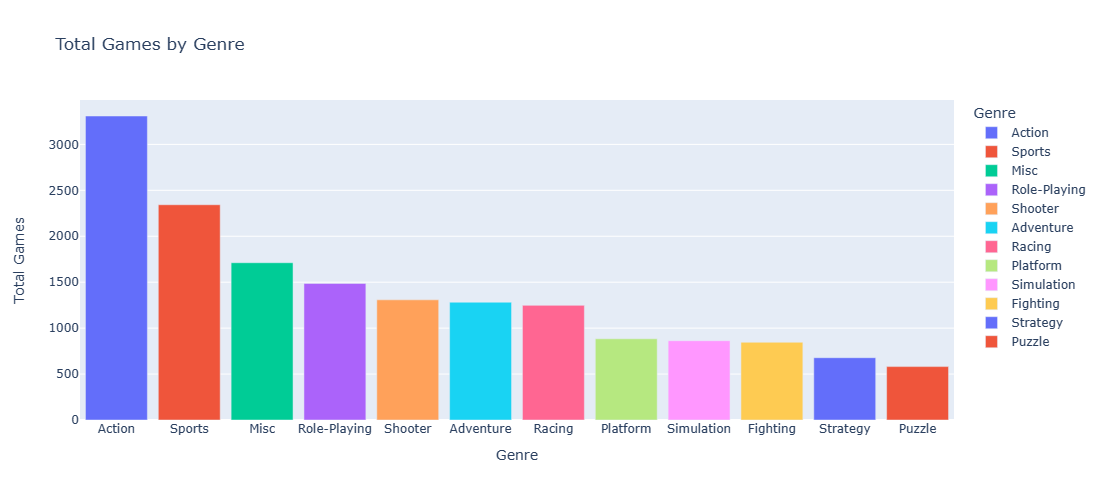

In [26]:
fig= px.bar(games_by_genre_a, 
            x= 'Genre', 
            y= 'Total Games', 
            title= 'Total Games by Genre',
            color= 'Genre',
            labels= {'value': 'Total Games'})

fig.update_layout(
    width= 1000, 
    height= 500, 
    bargap= 0.15)
fig.write_image('games_by_genre.png')
fig.show()

In [27]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0   1.0                Wii Sports      Wii  2006        Sports  Nintendo   
1   2.0         Super Mario Bros.      NES  1985      Platform  Nintendo   
2   3.0            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3   4.0         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4   5.0  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

#### Games Released by Year

In [28]:
yearly_games_release= df.groupby('Year')['Name'].count().reset_index(name= 'Total Games')
yearly_games_release.sort_values(by= 'Year', ascending= True, inplace= True)
yearly_games_release

Year  Total Games
0   1980            9
1   1981           46
2   1982           36
3   1983           17
4   1984           14
5   1985           14
6   1986           21
7   1987           16
8   1988           15
9   1989           17
10  1990           16
11  1991           41
12  1992           43
13  1993           60
14  1994          121
15  1995          219
16  1996          263
17  1997          289
18  1998          379
19  1999          338
20  2000          349
21  2001          482
22  2002          829
23  2003          775
24  2004          744
25  2005          936
26  2006         1257
27  2007         1201
28  2008         1428
29  2009         1431
30  2010         1257
31  2011         1136
32  2012          655
33  2013          546
34  2014          580
35  2015          614
36  2016          342
37  2017            3
38  2020            1

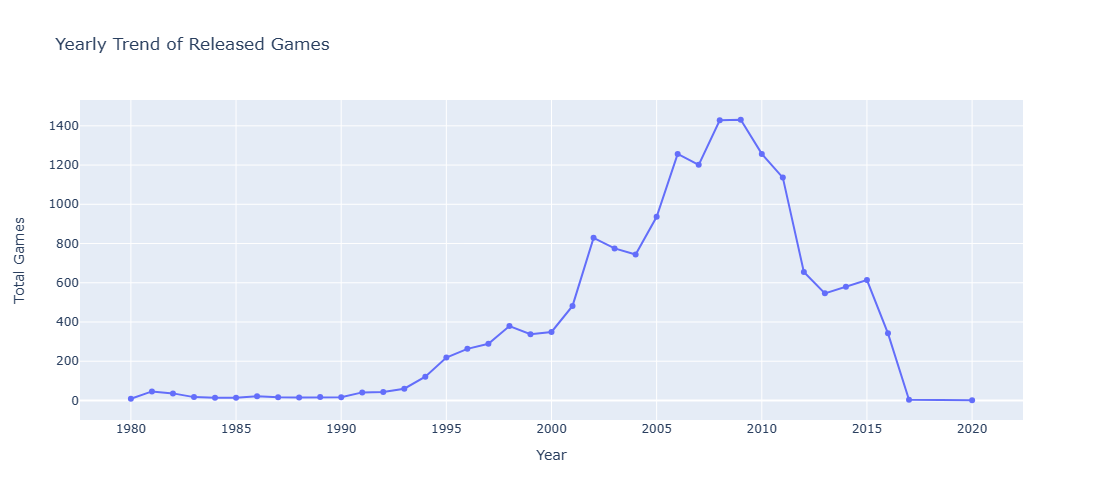

In [29]:
fig= px.line(yearly_games_release, 
             x= 'Year', 
             y= 'Total Games',
             title= 'Yearly Trend of Released Games', 
             markers= True)
fig.update_layout(
    width= 1000, 
    height= 500)
fig.show()

In [30]:
yearly_games_release['Total Games'].sum()

16540

In [31]:
game_year= df['Year'].value_counts().reset_index(name= 'Total Games')
game_year= game_year.sort_values(by= 'Year').reset_index(drop= True)
game_year

Year  Total Games
0   1980            9
1   1981           46
2   1982           36
3   1983           17
4   1984           14
5   1985           14
6   1986           21
7   1987           16
8   1988           15
9   1989           17
10  1990           16
11  1991           41
12  1992           43
13  1993           60
14  1994          121
15  1995          219
16  1996          263
17  1997          289
18  1998          379
19  1999          338
20  2000          349
21  2001          482
22  2002          829
23  2003          775
24  2004          744
25  2005          936
26  2006         1257
27  2007         1201
28  2008         1428
29  2009         1431
30  2010         1257
31  2011         1136
32  2012          655
33  2013          546
34  2014          580
35  2015          614
36  2016          342
37  2017            3
38  2020            1

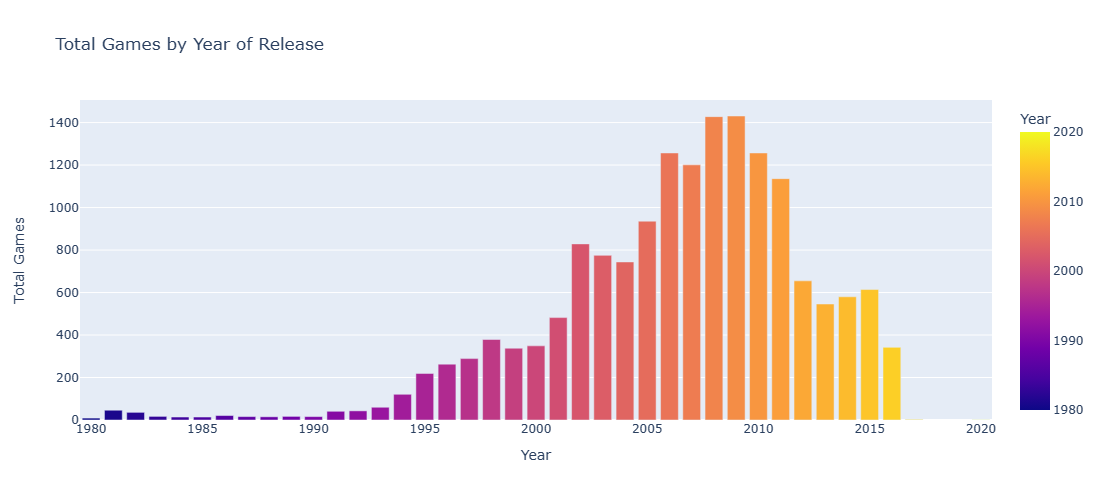

In [32]:
fig= px.bar(game_year, 
            x= 'Year', 
            y= 'Total Games', 
            title= 'Total Games by Year of Release',
            color= 'Year',
            labels= {'value': 'Total Games'})

fig.update_layout(
    width= 1000, 
    height= 500, 
    bargap= 0.2)
fig.write_image('total_games_by_release_year.png')
fig.show()

#### Top Five Years Game Released by Genre

In [33]:
top_five_years= yearly_games_release.sort_values(by= 'Total Games', ascending= False).reset_index(drop= True).iloc[:5]
top_five_years= top_five_years.sort_values(by='Year').reset_index(drop= True)
top_five_years

Year  Total Games
0  2006         1257
1  2007         1201
2  2008         1428
3  2009         1431
4  2010         1257

In [34]:
data_top_five_df= df[(df['Year'] >= 2006) & (df['Year'] <= 2010)].reset_index(drop= True)
data_top_five_df

Rank                                               Name Platform  \
0         1.0                                         Wii Sports      Wii   
1         3.0                                     Mario Kart Wii      Wii   
2         4.0                                  Wii Sports Resort      Wii   
3         7.0                              New Super Mario Bros.       DS   
4         8.0                                           Wii Play      Wii   
...       ...                                                ...      ...   
6569  16591.0                                   Mega Brain Boost       DS   
6570  16593.0  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
6571  16595.0                                           Plushees       DS   
6572  16598.0   SCORE International Baja 1000: The Official Game      PS2   
6573  16599.0                                         Know How 2       DS   

      Year         Genre              Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     2006        Sports               Nintendo     41.49     29.02      3.77   
1     2008        Racing               Nintendo     15.85     12.88      3.79   
2     2009        Sports               Nintendo     15.75     11.01      3.28   
3     2006      Platform               Nintendo     11.38      9.23      6.50   
4     2006          Misc               Nintendo     14.03      9.20      2.93   
...    ...           ...                    ...       ...       ...       ...   
6569  2008        Puzzle  Majesco Entertainment      0.01      0.00      0.00   
6570  2007  Role-Playing     Falcom Corporation      0.00      0.00      0.01   
6571  2008    Simulation              Destineer      0.01      0.00      0.00   
6572  2008        Racing             Activision      0.00      0.00      0.00   
6573  2010        Puzzle               7G//AMES      0.00      0.01      0.00   

      Other_Sales  Global_Sales  
0            8.46         82.74  
1            3.31         35.82  
2            2.96         33.00  
3            2.90         30.01  
4            2.85         29.02  
...           ...           ...  
6569         0.00          0.01  
6570         0.00          0.01  
6571         0.00          0.01  
6572         0.00          0.01  
6573         0.00          0.01  

[6574 rows x 11 columns]

In [35]:
games_by_genre_top_years= data_top_five_df.groupby(['Year', 'Genre'])['Genre'].count().reset_index(name= 'Total Games')
games_by_genre_top_years.head()

Year      Genre  Total Games
0  2006     Action          242
1  2006  Adventure           79
2  2006   Fighting           65
3  2006       Misc          135
4  2006   Platform           63

In [36]:
top_years= top_five_years['Year'].tolist()
top_years

[2006, 2007, 2008, 2009, 2010]

In [37]:
filtered_df= df[df['Year'].isin(top_years)].reset_index(drop= True)
filtered_df

Rank                                               Name Platform  \
0         1.0                                         Wii Sports      Wii   
1         3.0                                     Mario Kart Wii      Wii   
2         4.0                                  Wii Sports Resort      Wii   
3         7.0                              New Super Mario Bros.       DS   
4         8.0                                           Wii Play      Wii   
...       ...                                                ...      ...   
6569  16591.0                                   Mega Brain Boost       DS   
6570  16593.0  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
6571  16595.0                                           Plushees       DS   
6572  16598.0   SCORE International Baja 1000: The Official Game      PS2   
6573  16599.0                                         Know How 2       DS   

      Year         Genre              Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     2006        Sports               Nintendo     41.49     29.02      3.77   
1     2008        Racing               Nintendo     15.85     12.88      3.79   
2     2009        Sports               Nintendo     15.75     11.01      3.28   
3     2006      Platform               Nintendo     11.38      9.23      6.50   
4     2006          Misc               Nintendo     14.03      9.20      2.93   
...    ...           ...                    ...       ...       ...       ...   
6569  2008        Puzzle  Majesco Entertainment      0.01      0.00      0.00   
6570  2007  Role-Playing     Falcom Corporation      0.00      0.00      0.01   
6571  2008    Simulation              Destineer      0.01      0.00      0.00   
6572  2008        Racing             Activision      0.00      0.00      0.00   
6573  2010        Puzzle               7G//AMES      0.00      0.01      0.00   

      Other_Sales  Global_Sales  
0            8.46         82.74  
1            3.31         35.82  
2            2.96         33.00  
3            2.90         30.01  
4            2.85         29.02  
...           ...           ...  
6569         0.00          0.01  
6570         0.00          0.01  
6571         0.00          0.01  
6572         0.00          0.01  
6573         0.00          0.01  

[6574 rows x 11 columns]

In [38]:
top_years_genre_count= filtered_df.groupby(['Year', 'Genre']).size().reset_index(name= 'Total Games')
top_years_genre_count.head()

Year      Genre  Total Games
0  2006     Action          242
1  2006  Adventure           79
2  2006   Fighting           65
3  2006       Misc          135
4  2006   Platform           63

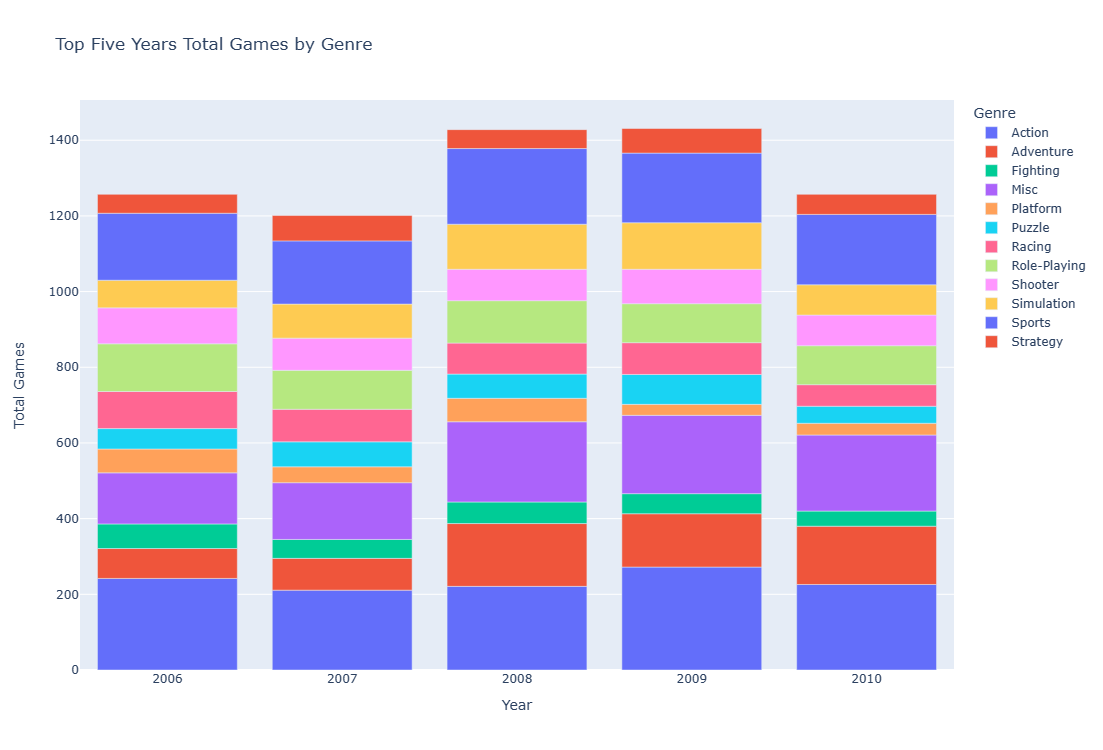

In [39]:
fig= px.bar(top_years_genre_count, 
            x= 'Year', 
            y= 'Total Games', 
            title= 'Top Five Years Total Games by Genre',
            color= 'Genre',
            labels= {'value': 'Total Games'})

fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.show()

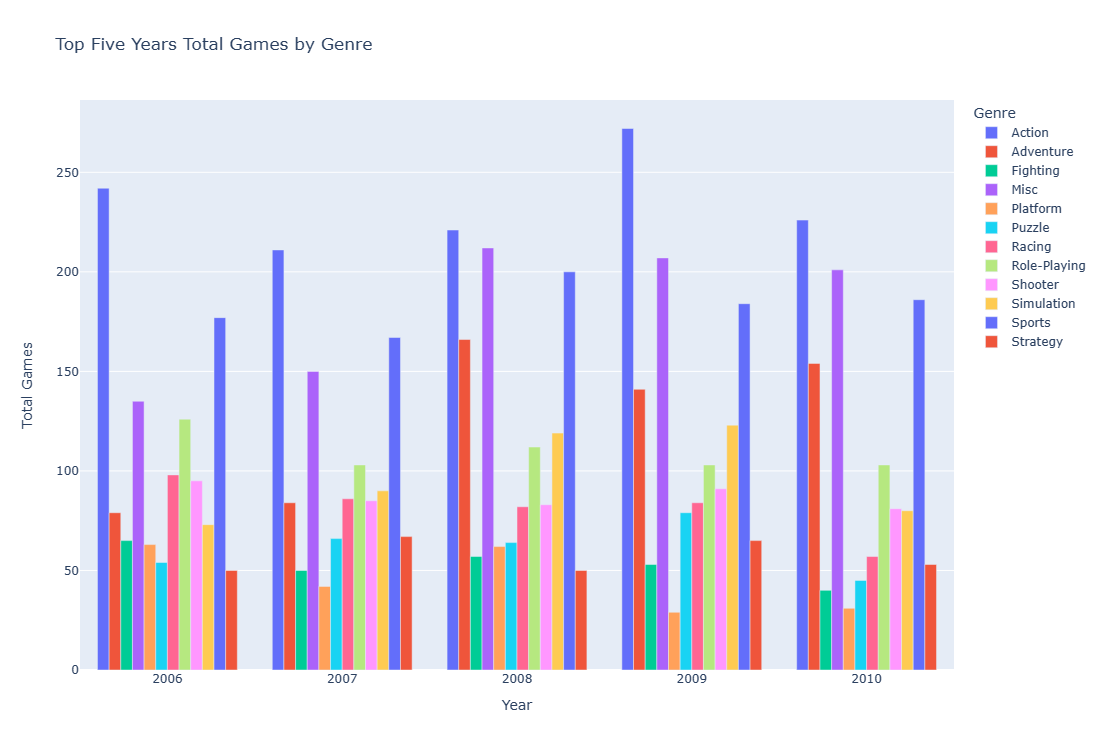

In [40]:
fig= px.bar(top_years_genre_count, 
            x= 'Year', 
            y= 'Total Games', 
            title= 'Top Five Years Total Games by Genre',
            color= 'Genre',
            labels= {'value': 'Total Games'}, 
            barmode= 'group')

fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.write_image('top_five_years_games_by_genre.png')
fig.show()

#### Global Sales by Year

In [41]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [42]:
yearly_sales= df.groupby('Year')['Global_Sales'].sum().reset_index(name= 'Total Sales')
yearly_sales

Year  Total Sales
0   1980        11.38
1   1981        35.77
2   1982        28.86
3   1983        16.79
4   1984        50.36
5   1985        53.94
6   1986        37.07
7   1987        21.74
8   1988        47.22
9   1989        73.45
10  1990        49.39
11  1991        32.23
12  1992        76.16
13  1993        45.98
14  1994        79.17
15  1995        88.11
16  1996       199.15
17  1997       200.98
18  1998       256.47
19  1999       251.27
20  2000       201.56
21  2001       331.47
22  2002       395.52
23  2003       357.85
24  2004       414.01
25  2005       458.51
26  2006       614.63
27  2007       609.92
28  2008       678.90
29  2009       667.30
30  2010       600.29
31  2011       515.80
32  2012       363.49
33  2013       368.11
34  2014       337.03
35  2015       264.44
36  2016        70.90
37  2017         0.05
38  2020         0.29

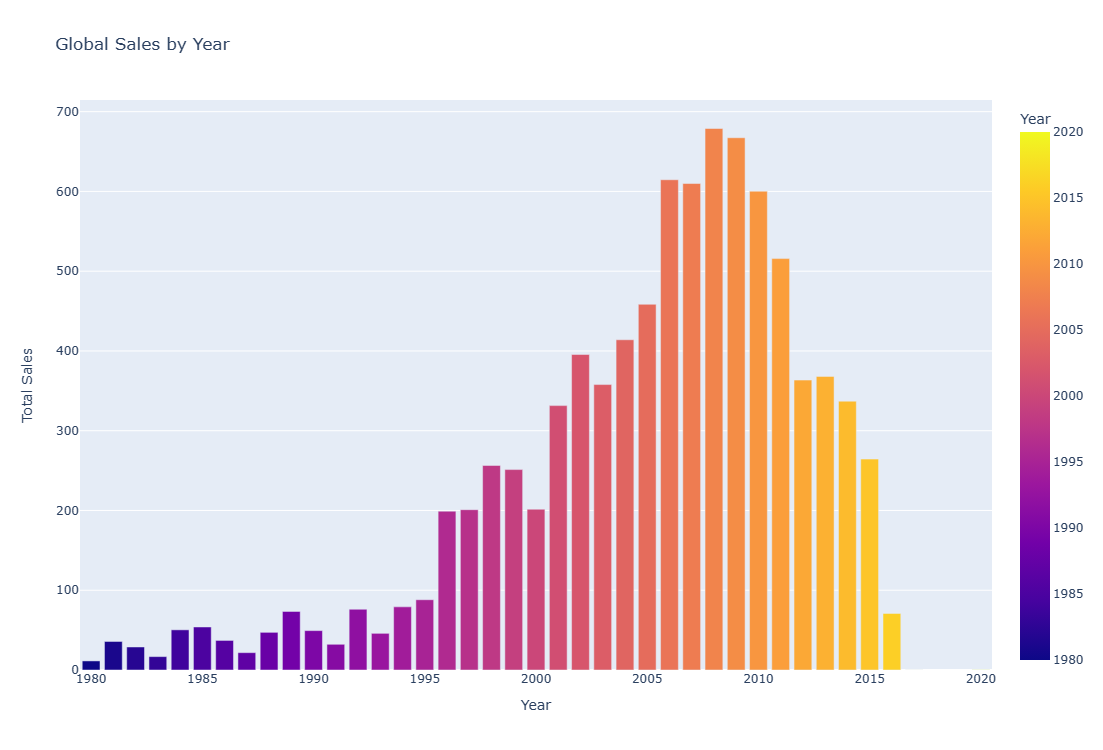

In [43]:
fig= px.bar(yearly_sales, 
            x= 'Year', 
            y= 'Total Sales', 
            title= 'Global Sales by Year',
            color= 'Year',
            labels= {'value': 'Total Sales'})

fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.write_image('global_sales_yearly.png')
fig.show()

In [44]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [45]:
year_count= df.groupby(['Year']).size().reset_index(name= 'Total Count')
year_count

Year  Total Count
0   1980            9
1   1981           46
2   1982           36
3   1983           17
4   1984           14
5   1985           14
6   1986           21
7   1987           16
8   1988           15
9   1989           17
10  1990           16
11  1991           41
12  1992           43
13  1993           60
14  1994          121
15  1995          219
16  1996          263
17  1997          289
18  1998          379
19  1999          338
20  2000          349
21  2001          482
22  2002          829
23  2003          775
24  2004          744
25  2005          936
26  2006         1257
27  2007         1201
28  2008         1428
29  2009         1431
30  2010         1257
31  2011         1136
32  2012          655
33  2013          546
34  2014          580
35  2015          614
36  2016          342
37  2017            3
38  2020            1

In [46]:
year_count_a= df['Year'].value_counts().reset_index(name= 'Total Count')
year_count_a

Year  Total Count
0   2009         1431
1   2008         1428
2   2006         1257
3   2010         1257
4   2007         1201
5   2011         1136
6   2005          936
7   2002          829
8   2003          775
9   2004          744
10  2012          655
11  2015          614
12  2014          580
13  2013          546
14  2001          482
15  1998          379
16  2000          349
17  2016          342
18  1999          338
19  1997          289
20  1996          263
21  1995          219
22  1994          121
23  1993           60
24  1981           46
25  1992           43
26  1991           41
27  1982           36
28  1986           21
29  1989           17
30  1983           17
31  1990           16
32  1987           16
33  1988           15
34  1985           14
35  1984           14
36  1980            9
37  2017            3
38  2020            1

#### Total Sales by Genre

In [47]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [48]:
genre_global_sales= df.groupby('Genre')['Global_Sales'].sum().reset_index(name= 'Total Global Sales')
genre_global_sales.sort_values(by= 'Total Global Sales', ascending= False, inplace= True, ignore_index= True)
genre_global_sales

Genre  Total Global Sales
0         Action             1750.33
1         Sports             1329.35
2        Shooter             1037.32
3   Role-Playing              927.31
4       Platform              830.87
5           Misc              802.15
6         Racing              732.03
7       Fighting              445.70
8     Simulation              391.96
9         Puzzle              244.94
10     Adventure              238.77
11      Strategy              174.83

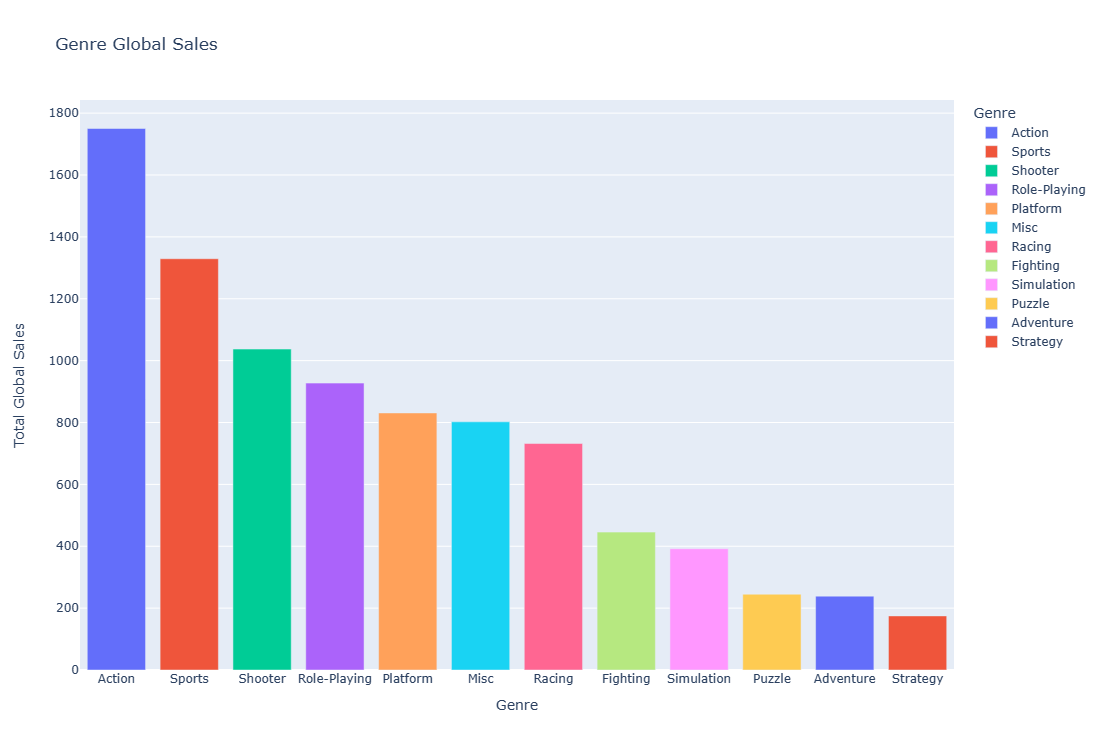

In [49]:
fig= px.bar(genre_global_sales, 
            x= 'Genre', 
            y= 'Total Global Sales', 
            title= 'Genre Global Sales',
            color= 'Genre',
            labels= {'value': 'Total Sales'})

fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.show()

#### Genre Released Most in Each Year

In [50]:
yearly_genre_count= df.groupby(['Year', 'Genre']).size().reset_index(name= 'Total Games')
yearly_genre_count

Year         Genre  Total Games
0    1980        Action            1
1    1980      Fighting            1
2    1980          Misc            4
3    1980       Shooter            2
4    1980        Sports            1
..    ...           ...          ...
384  2016        Sports           38
385  2016      Strategy           10
386  2017        Action            1
387  2017  Role-Playing            2
388  2020    Simulation            1

[389 rows x 3 columns]

##### Filtering the year with maximum games produced
- drop the first occurence incase of year appearing more than one

In [51]:
year_max_id= yearly_genre_count.groupby('Year')['Total Games'].transform('max') == yearly_genre_count['Total Games']
year_max_genre= yearly_genre_count[year_max_id].reset_index(drop= True)
year_max_genre.drop_duplicates(subset=['Year', 'Total Games'], keep= 'last', inplace= True, ignore_index= True)
year_max_genre


Year         Genre  Total Games
0   1980          Misc            4
1   1981        Action           25
2   1982        Action           18
3   1983        Action            7
4   1984       Shooter            3
5   1985        Puzzle            4
6   1986      Platform            6
7   1987        Sports            4
8   1988      Platform            4
9   1989        Puzzle            5
10  1990        Sports            3
11  1991        Sports            7
12  1992      Fighting            7
13  1993      Platform           11
14  1994        Sports           22
15  1995        Sports           29
16  1996        Sports           52
17  1997        Sports           46
18  1998        Sports           70
19  1999        Sports           62
20  2000        Sports           81
21  2001        Sports           96
22  2002        Sports          188
23  2003        Action          144
24  2004        Action          125
25  2005        Action          192
26  2006        Action          242
27  2007        Action          211
28  2008        Action          221
29  2009        Action          272
30  2010        Action          226
31  2011        Action          239
32  2012        Action          265
33  2013        Action          148
34  2014        Action          186
35  2015        Action          255
36  2016        Action          118
37  2017  Role-Playing            2
38  2020    Simulation            1

In [52]:
year_max_genre.index

RangeIndex(start=0, stop=39, step=1)

In [53]:
genre_values= year_max_genre['Genre'].values
genre_values

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Role-Playing', 'Simulation'], dtype=object)

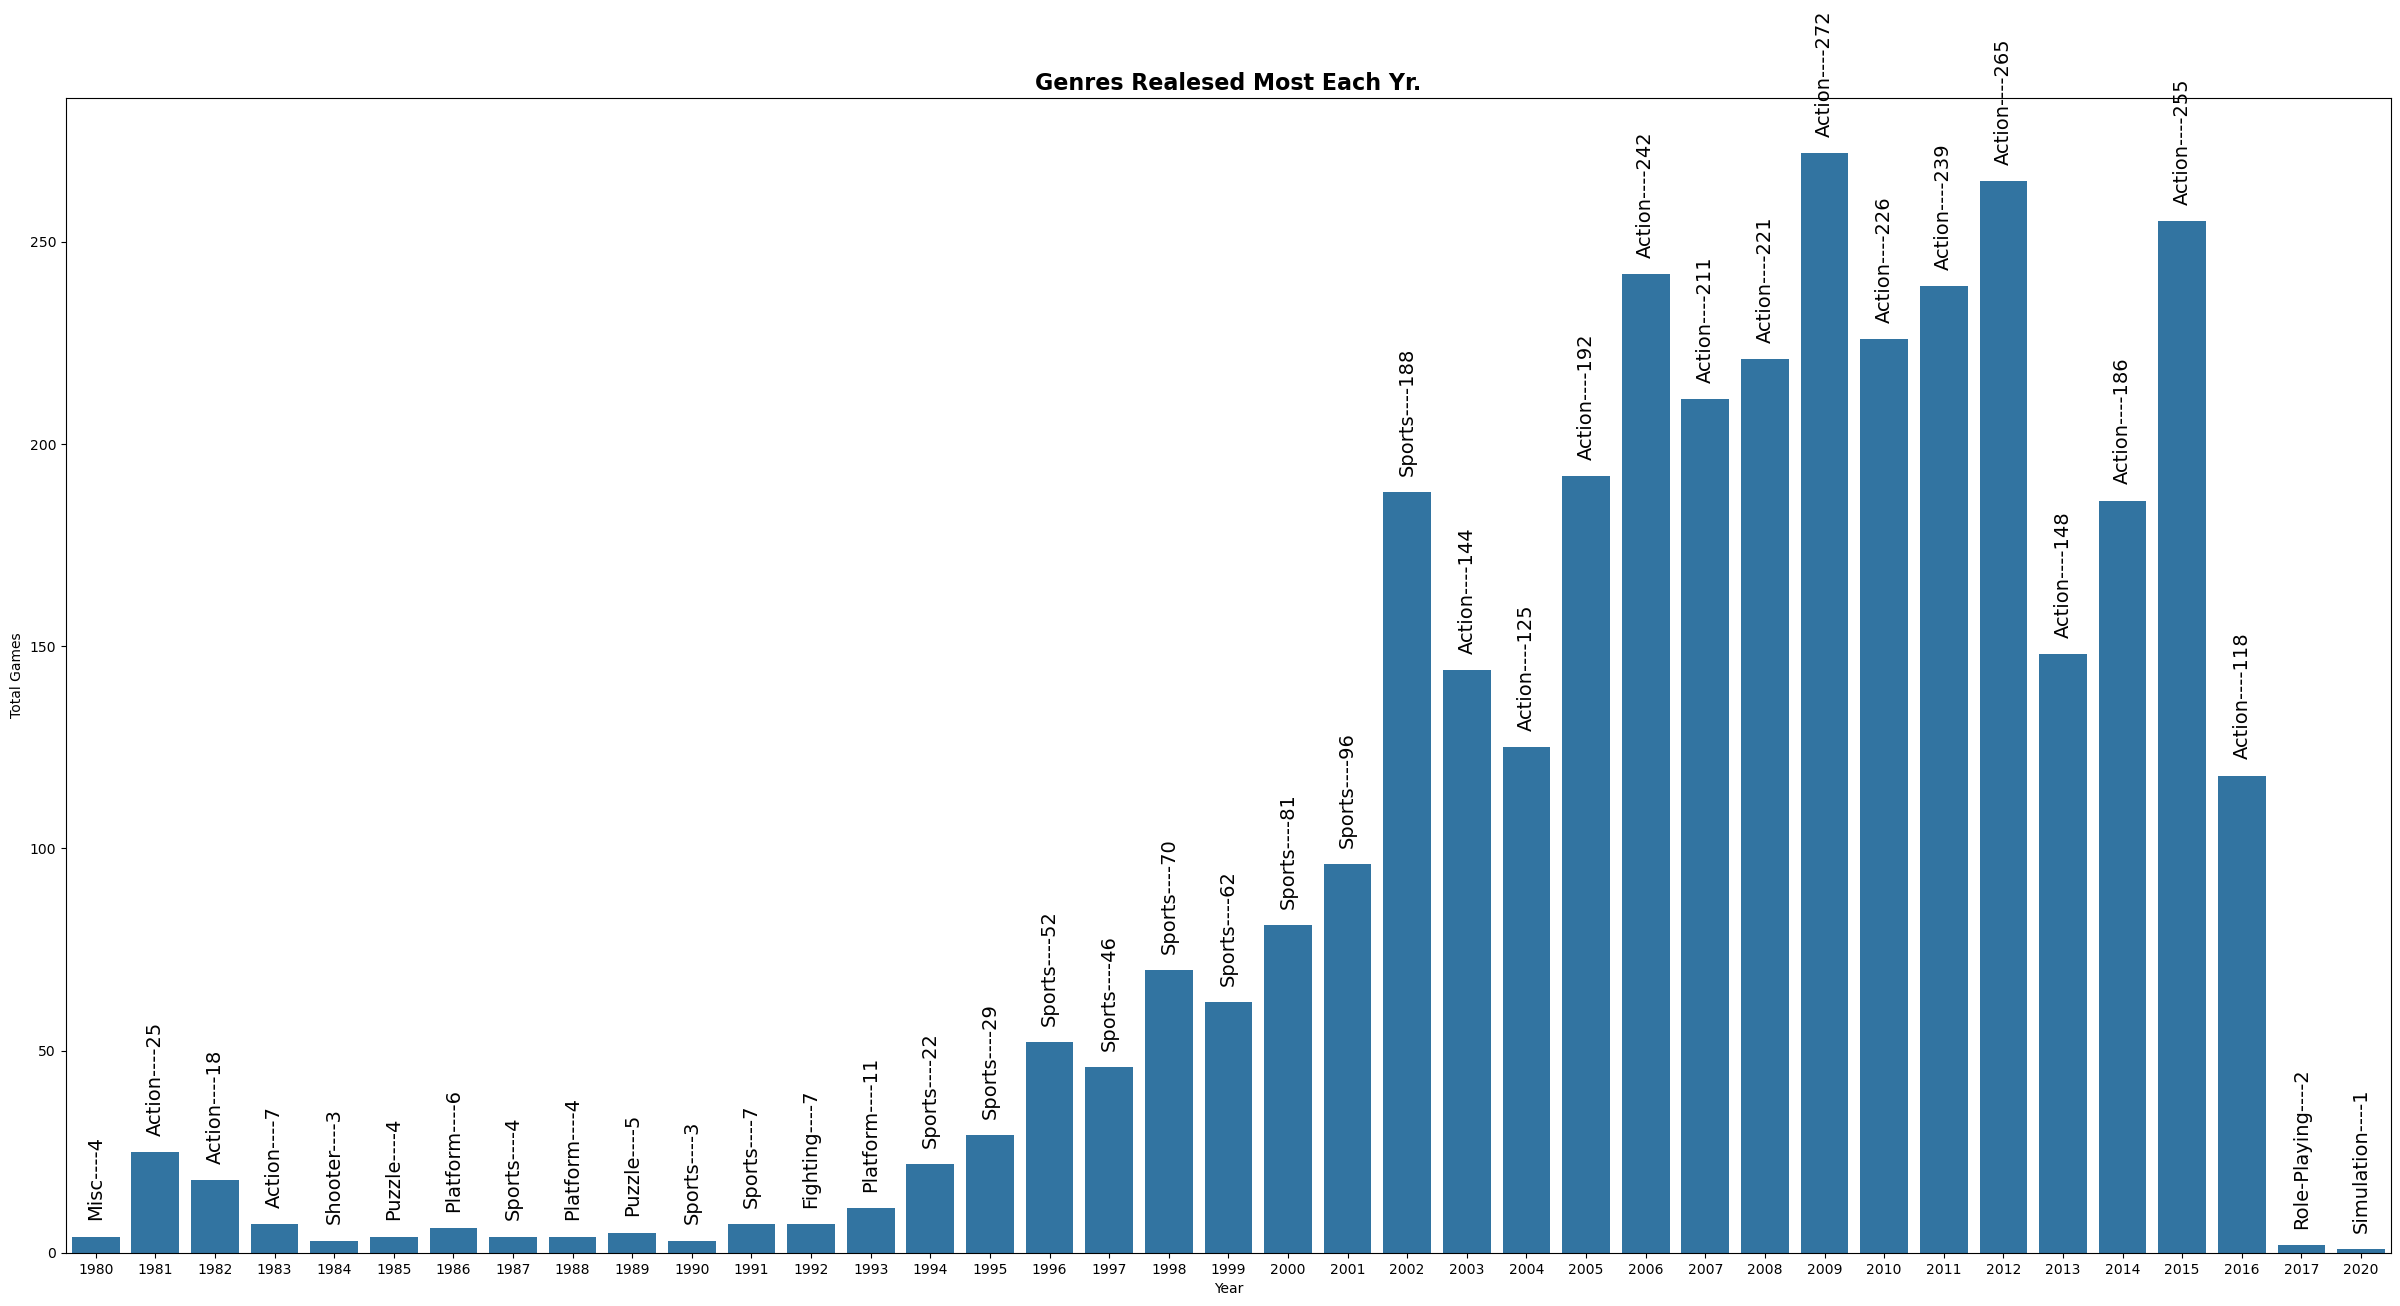

In [54]:
plt.figure(figsize= (30,15))
g= sns.barplot(x= 'Year', y= 'Total Games', data= year_max_genre)
plt.title('Genres Realesed Most Each Yr.', fontsize= 16, weight= 'bold')
index= 0
for value in year_max_genre['Total Games'].values:
    g.text(index, value + 5, str(genre_values[index] + '----' + str(value)), color= '#000', size= 14, rotation= 90, ha= 'center')
    index += 1

plt.savefig('max_genre_by_games_produced_yearly.png')

#### Genre with Maximum Global Sales Yearly

In [55]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [56]:
yearly_genre_sales= df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(name= 'Total Sales')
yearly_genre_sales.head()

Year     Genre  Total Sales
0  1980    Action         0.34
1  1980  Fighting         0.77
2  1980      Misc         2.71
3  1980   Shooter         7.07
4  1980    Sports         0.49

In [57]:
year_max_sales_id= yearly_genre_sales.groupby('Year')['Total Sales'].transform('max') == yearly_genre_sales['Total Sales']
year_max_genre_sales= yearly_genre_sales[year_max_sales_id].reset_index(drop= True)
year_max_genre_sales['Total Sales']= year_max_genre_sales['Total Sales'].round(2)
year_max_genre_sales.head()

Year     Genre  Total Sales
0  1980   Shooter         7.07
1  1981    Action        14.84
2  1982    Puzzle        10.03
3  1983  Platform         6.93
4  1984   Shooter        31.10

In [58]:
year_max_genre_sales.drop_duplicates(subset= ['Year', 'Total Sales'], keep= 'first', inplace= True, ignore_index= True)
year_max_genre_sales.head()

Year     Genre  Total Sales
0  1980   Shooter         7.07
1  1981    Action        14.84
2  1982    Puzzle        10.03
3  1983  Platform         6.93
4  1984   Shooter        31.10

In [59]:
genre_sales_values= year_max_genre_sales['Genre'].values
genre_sales_values

array(['Shooter', 'Action', 'Puzzle', 'Platform', 'Shooter', 'Platform',
       'Action', 'Fighting', 'Platform', 'Puzzle', 'Platform', 'Platform',
       'Fighting', 'Platform', 'Platform', 'Platform', 'Role-Playing',
       'Racing', 'Sports', 'Role-Playing', 'Sports', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Sports', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Role-Playing', 'Simulation'], dtype=object)

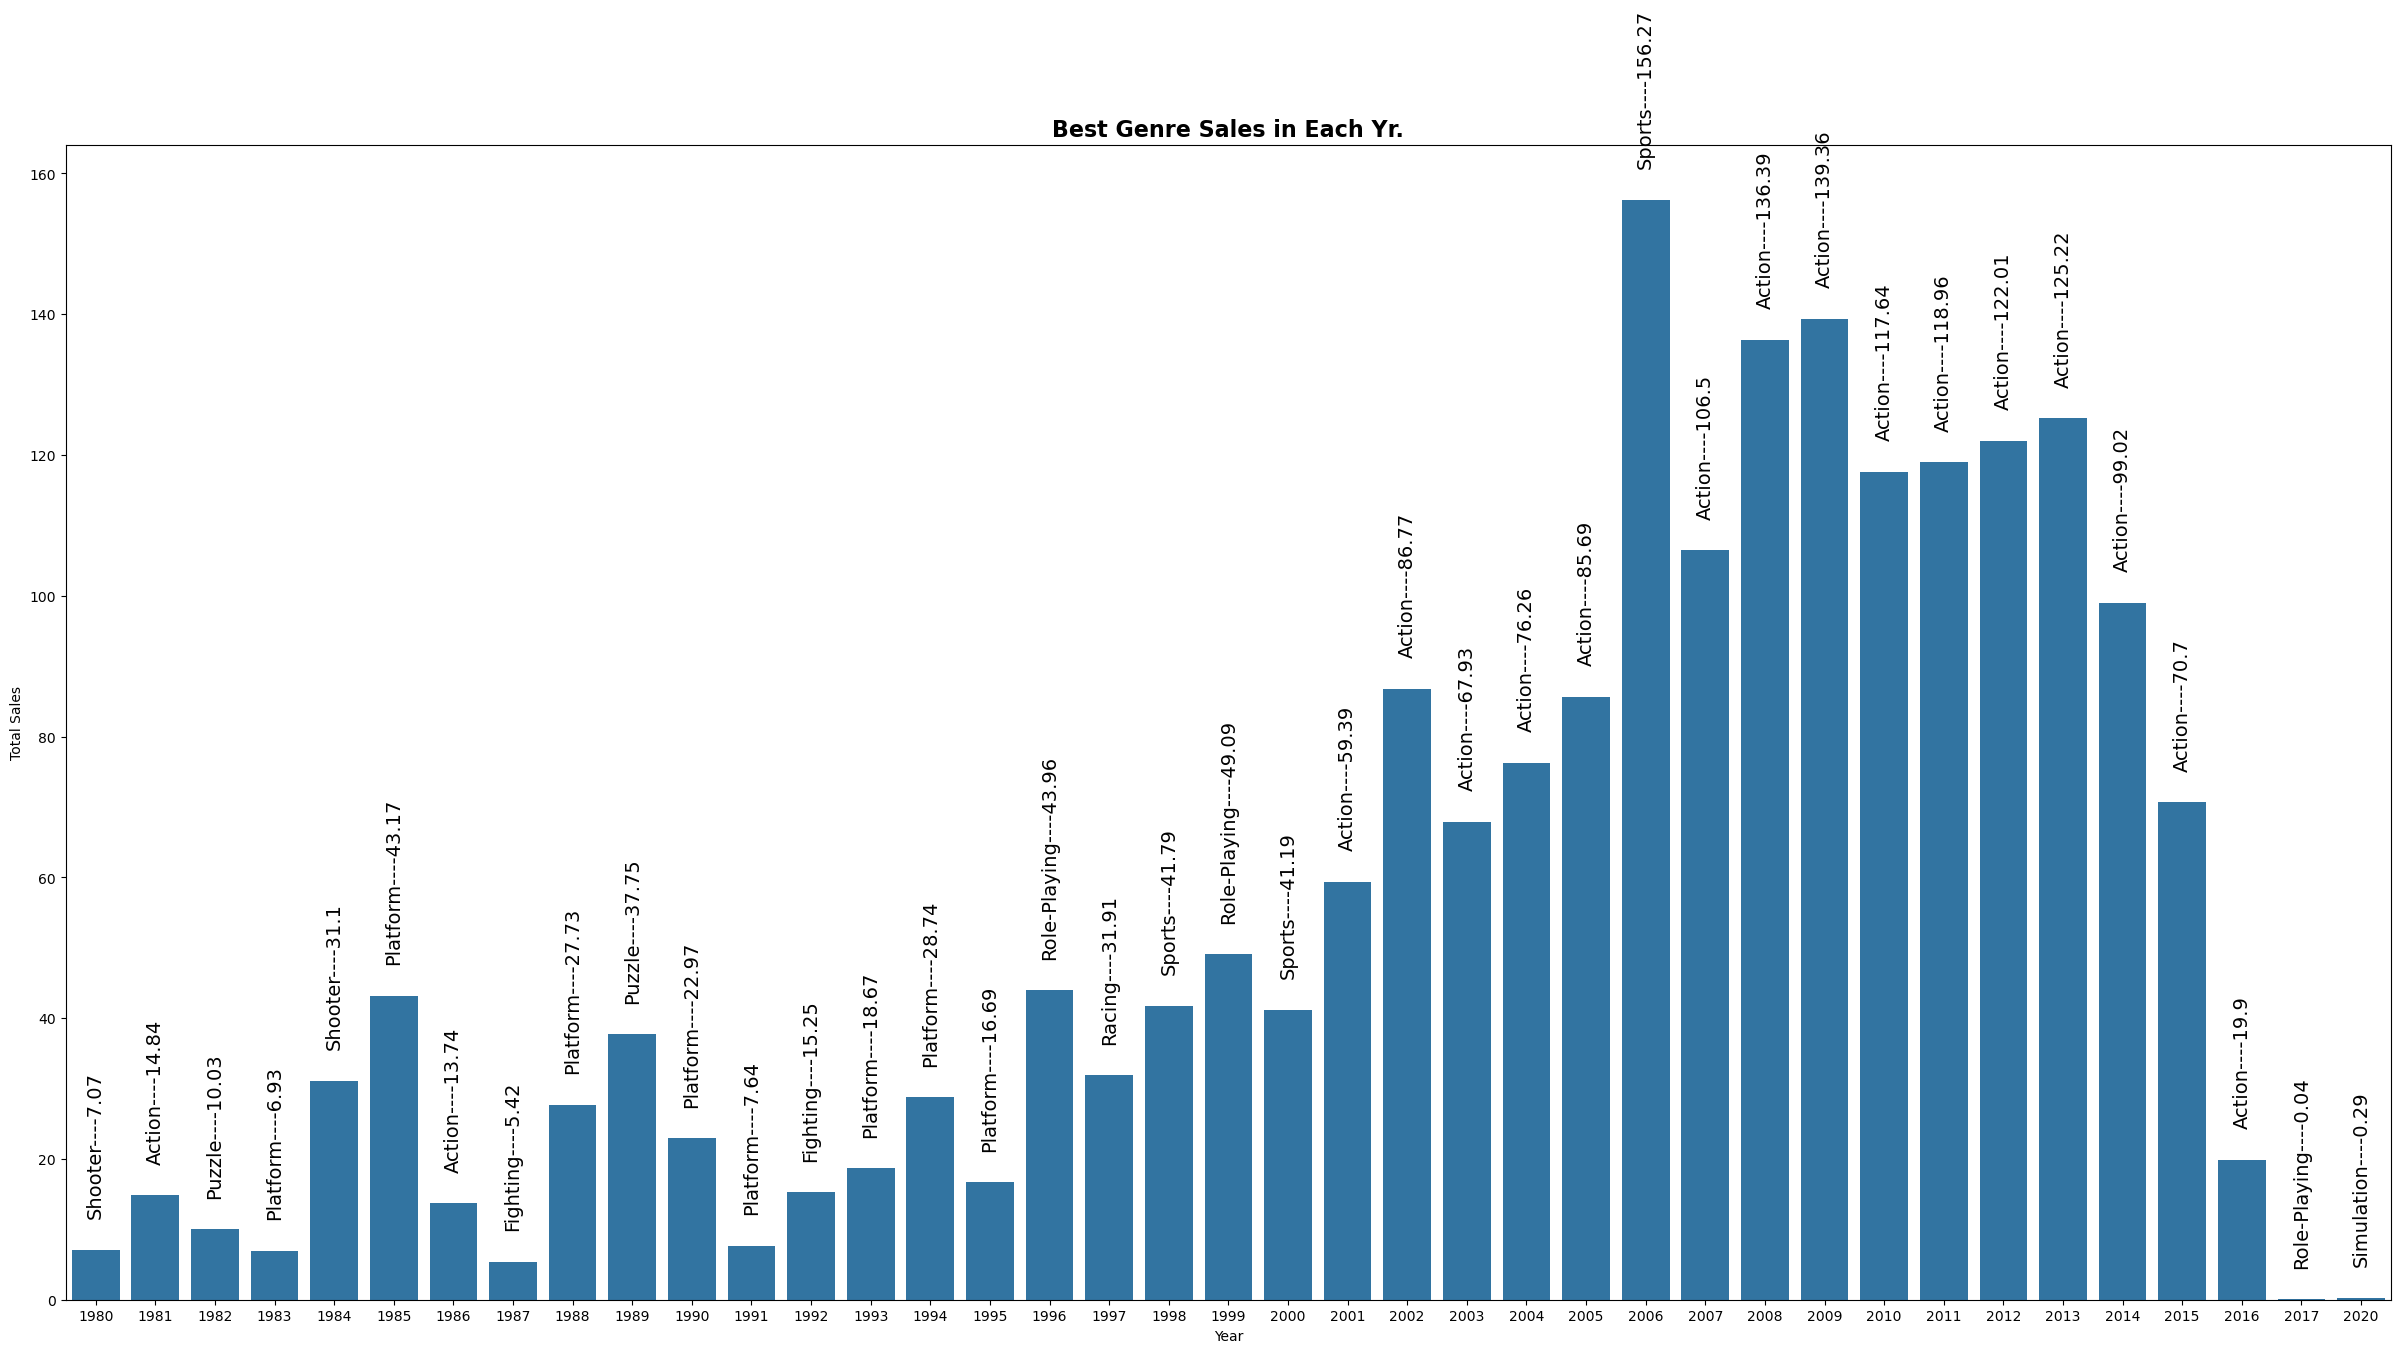

In [60]:
plt.figure(figsize= (30, 15))
g= sns.barplot(data= year_max_genre_sales, x= 'Year', y= 'Total Sales')
plt.title('Best Genre Sales in Each Yr.', fontsize= 16, weight= 'bold')

index= 0
for value in year_max_genre_sales['Total Sales'].values:
    g.text(index, value + 5, str(genre_sales_values[index] + '----' + str(value)), color= '#000', size= 14, rotation= 90, ha= 'center')
    index += 1

plt.savefig('best_genre_yearly_by_sales.png')

In [61]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [62]:
platform_yearly_sales= df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index(name= 'Total Sales')
platform_yearly_sales['Total Sales']= platform_yearly_sales['Total Sales'].round(2)
platform_yearly_sales

Year Platform  Total Sales
0    1980     2600        11.38
1    1981     2600        35.77
2    1982     2600        28.86
3    1983     2600         5.83
4    1983      NES        10.96
..    ...      ...          ...
242  2016     X360         0.83
243  2016     XOne        12.37
244  2017      PS4         0.03
245  2017      PSV         0.02
246  2020       DS         0.29

[247 rows x 3 columns]

In [63]:
platform_max_sales_id= platform_yearly_sales.groupby('Year')['Total Sales'].transform('max') == platform_yearly_sales['Total Sales']
platform_max_yearly_sales= platform_yearly_sales[platform_max_sales_id].reset_index(drop= True)
platform_max_yearly_sales.head()

Year Platform  Total Sales
0  1980     2600        11.38
1  1981     2600        35.77
2  1982     2600        28.86
3  1983      NES        10.96
4  1984      NES        50.09

In [64]:
platform_max_yearly_sales.drop_duplicates(subset= ['Year', 'Total Sales'], keep= 'first', inplace= True, ignore_index= True)
platform_max_yearly_sales.head()

Year Platform  Total Sales
0  1980     2600        11.38
1  1981     2600        35.77
2  1982     2600        28.86
3  1983      NES        10.96
4  1984      NES        50.09

In [65]:
platform_values= platform_max_yearly_sales['Platform'].values
platform_values

array(['2600', '2600', '2600', 'NES', 'NES', 'NES', 'NES', 'NES', 'NES',
       'GB', 'SNES', 'SNES', 'SNES', 'SNES', 'SNES', 'PS', 'PS', 'PS',
       'PS', 'PS', 'PS', 'PS2', 'PS2', 'PS2', 'PS2', 'PS2', 'Wii', 'Wii',
       'Wii', 'Wii', 'X360', 'PS3', 'PS3', 'PS3', 'PS4', 'PS4', 'PS4',
       'PS4', 'DS'], dtype=object)

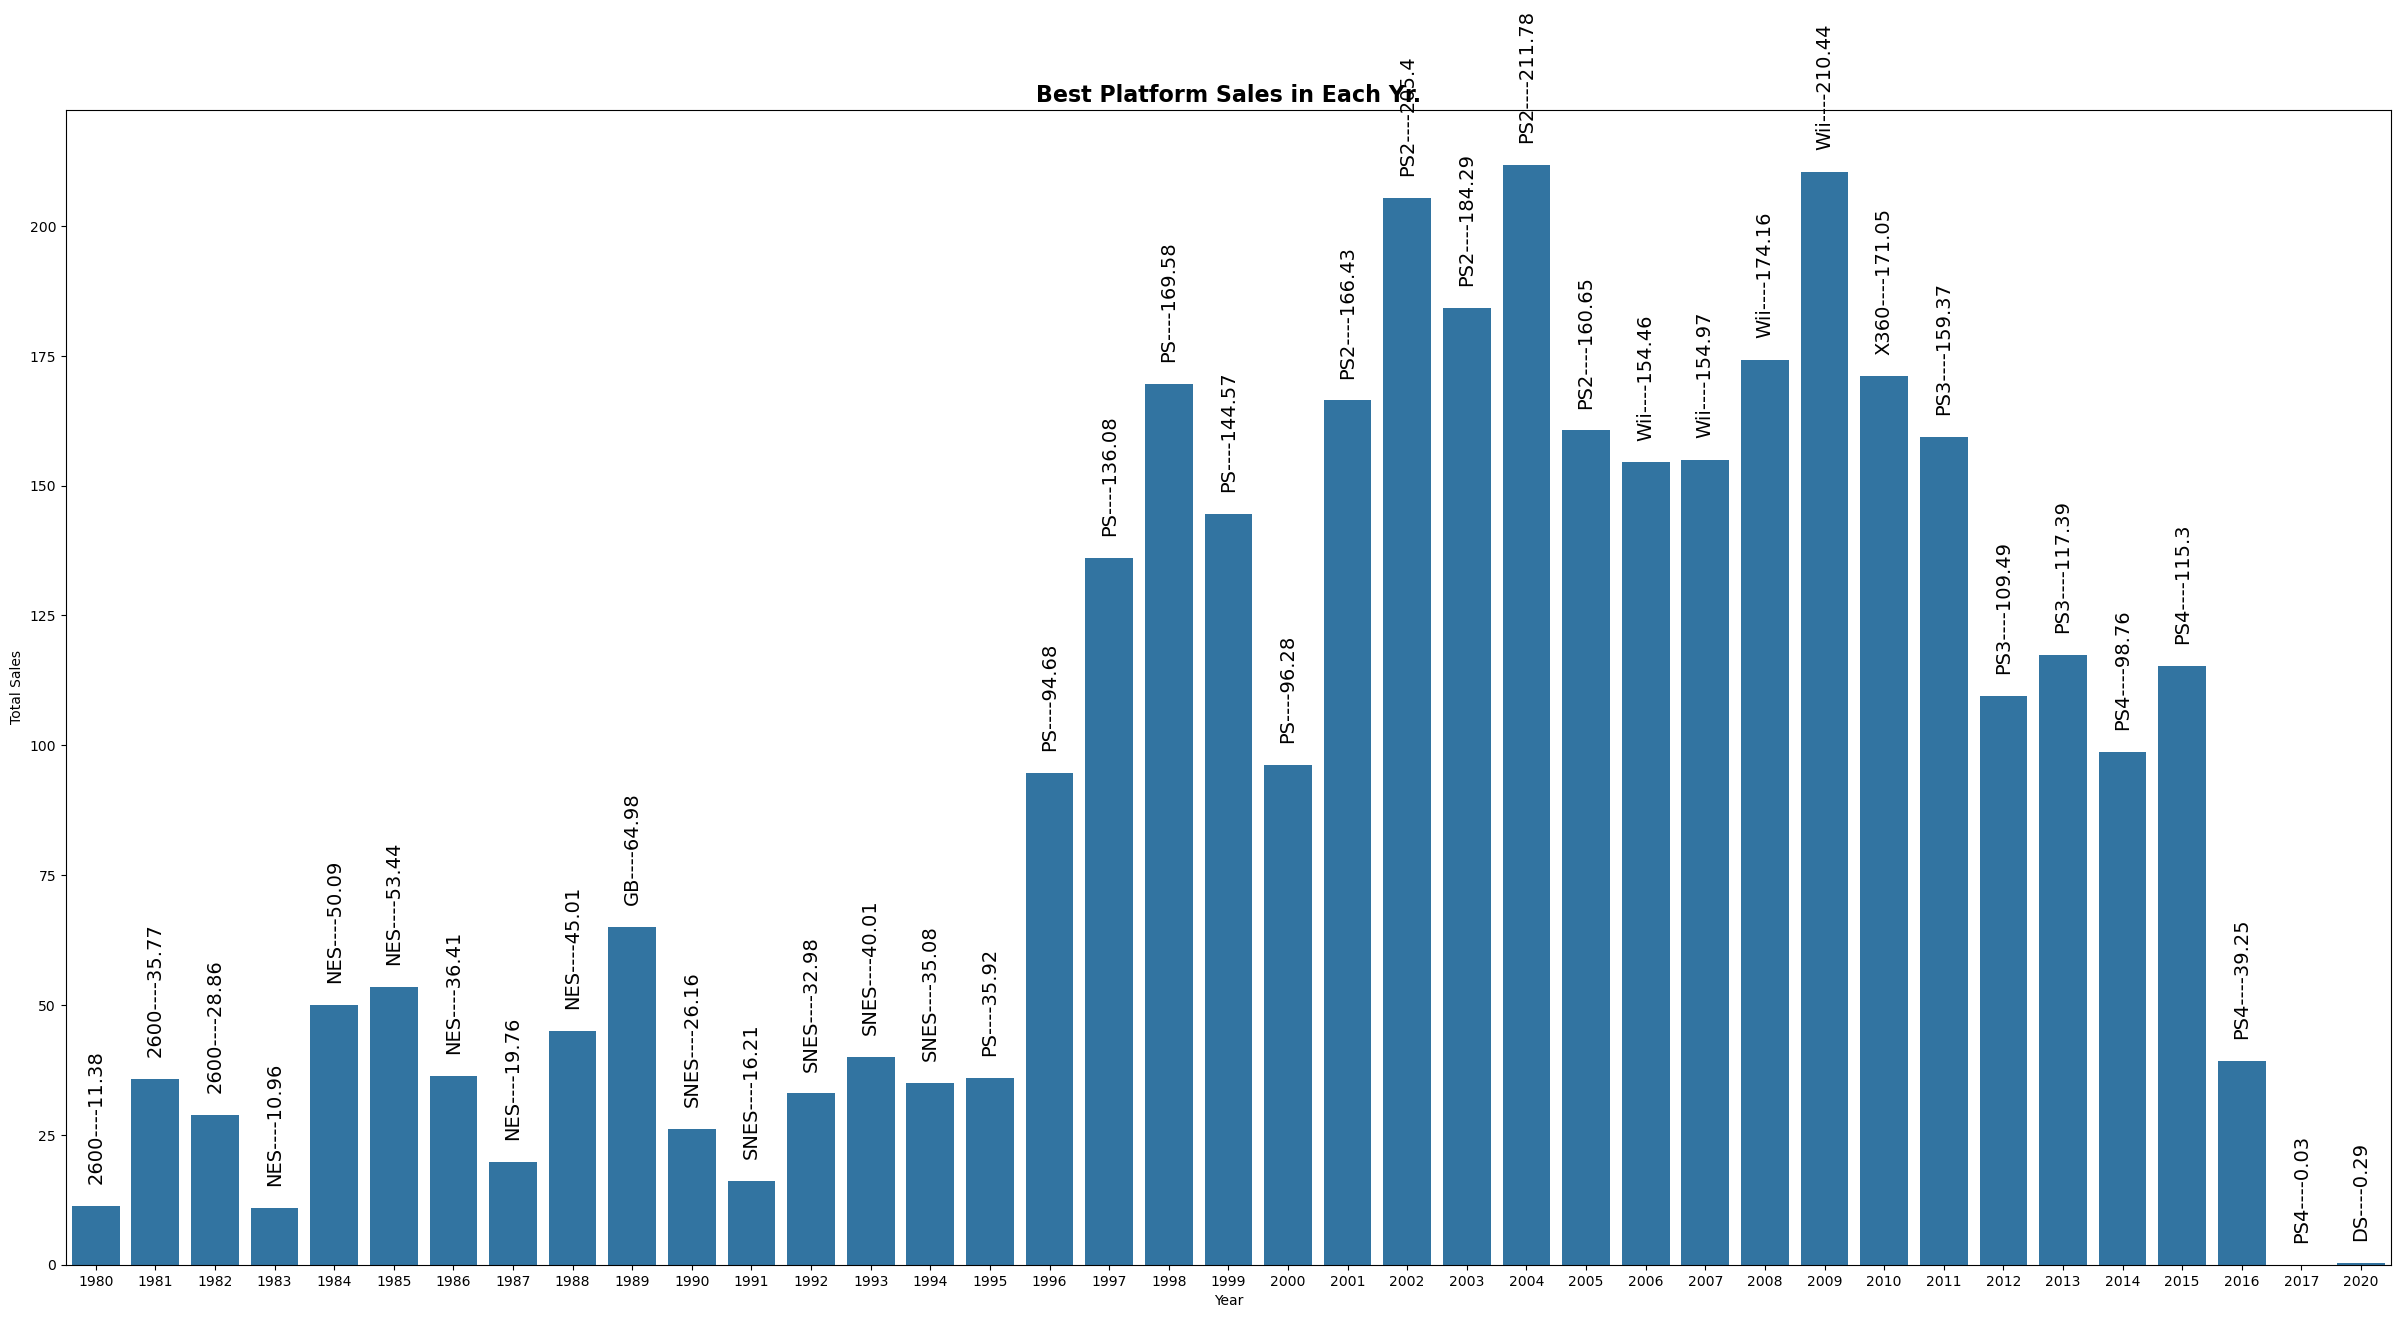

In [66]:
plt.figure(figsize= (30,15))
g= sns.barplot(data= platform_max_yearly_sales, x= 'Year', y= 'Total Sales')
plt.title('Best Platform Sales in Each Yr.', fontsize= 16, weight= 'bold')

index= 0
for value in platform_max_yearly_sales['Total Sales'].values:
    g.text(index, value + 5, str(platform_values[index] + '----' + str(value)), color= '#000', size= 14, rotation= 90, ha= 'center')
    index += 1

plt.savefig('best_platform_yearly_by_sales.png')

#### Global Sales by Platform

In [67]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

####

In [68]:
platform_sales= df.groupby('Platform')['Global_Sales'].sum().reset_index(name= 'Total Sales')
platform_sales= platform_sales.sort_values(by= 'Total Sales', ascending= False).reset_index(drop= True)
platform_sales.head()

Platform  Total Sales
0      PS2      1252.43
1     X360       979.89
2      PS3       957.29
3      Wii       926.36
4       DS       822.19

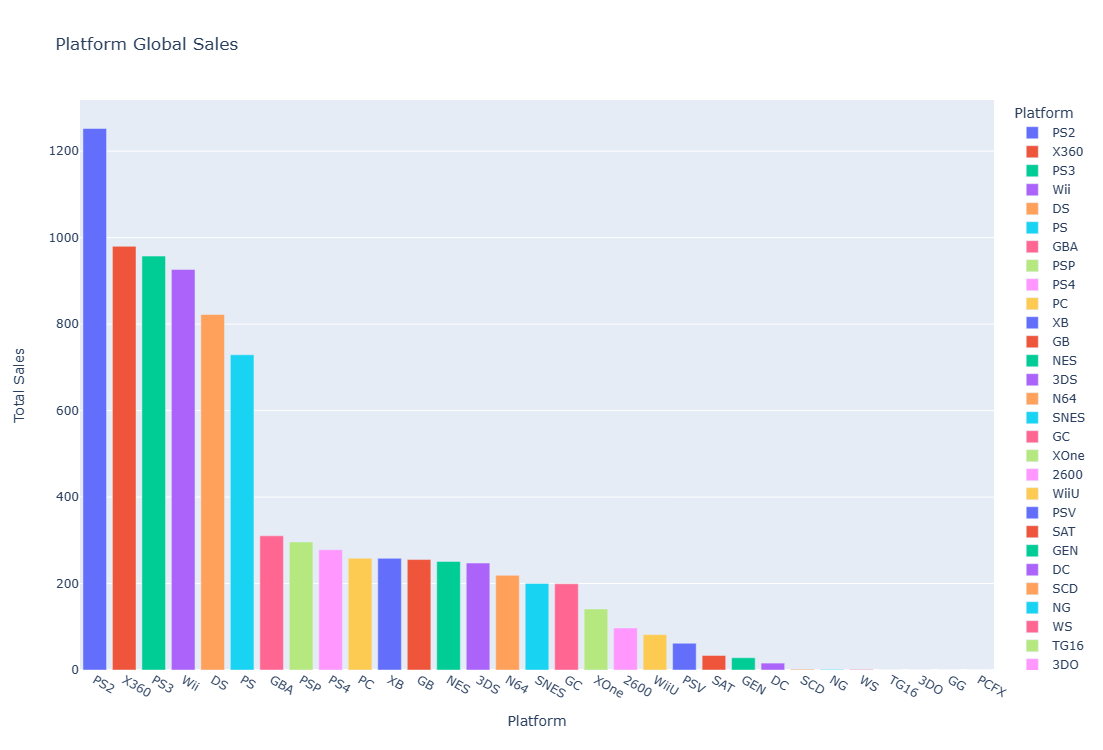

In [69]:
fig= px.bar(platform_sales, 
            x= 'Platform', 
            y= 'Total Sales', 
            title= 'Platform Global Sales',
            color= 'Platform',
            labels= {'value': 'Total Sales'})

fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.write_image('global_sales_by_platform.png')
fig.show()

#### Regional Sales Comparision by Genre

In [70]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [71]:
regional_sales_genre= df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
regional_sales_genre

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0         Action    877.54    524.92    159.49       187.35
1      Adventure    105.67     64.08     51.99        16.81
2       Fighting    221.92    100.22     87.35        36.24
3           Misc    404.67    213.93    107.72        75.22
4       Platform    447.05    201.13    130.77        51.59
5         Puzzle    123.78     50.77     57.31        12.55
6         Racing    359.42    238.38     56.69        77.27
7   Role-Playing    327.28    188.05    352.26        59.61
8        Shooter    582.59    313.24     38.28       102.69
9     Simulation    183.31    113.20     63.64        31.52
10        Sports    682.54    376.30    135.25       134.87
11      Strategy     68.64     45.23     49.34        11.36

In [72]:
reg_genre_sales= df.groupby('Genre').agg({
    'NA_Sales': 'sum', 
    'EU_Sales': 'sum', 
    'JP_Sales': 'sum', 
    'Other_Sales': 'sum'
}).reset_index()
reg_genre_sales.columns= ['Genre','Total NA_Sales', 'Total EU_Sales', 'Total JP_Sales', 'Total Other_Sales']
reg_genre_sales

Genre  Total NA_Sales  Total EU_Sales  Total JP_Sales  \
0         Action          877.54          524.92          159.49   
1      Adventure          105.67           64.08           51.99   
2       Fighting          221.92          100.22           87.35   
3           Misc          404.67          213.93          107.72   
4       Platform          447.05          201.13          130.77   
5         Puzzle          123.78           50.77           57.31   
6         Racing          359.42          238.38           56.69   
7   Role-Playing          327.28          188.05          352.26   
8        Shooter          582.59          313.24           38.28   
9     Simulation          183.31          113.20           63.64   
10        Sports          682.54          376.30          135.25   
11      Strategy           68.64           45.23           49.34   

    Total Other_Sales  
0              187.35  
1               16.81  
2               36.24  
3               75.22  
4               51.59  
5               12.55  
6               77.27  
7               59.61  
8              102.69  
9               31.52  
10             134.87  
11              11.36

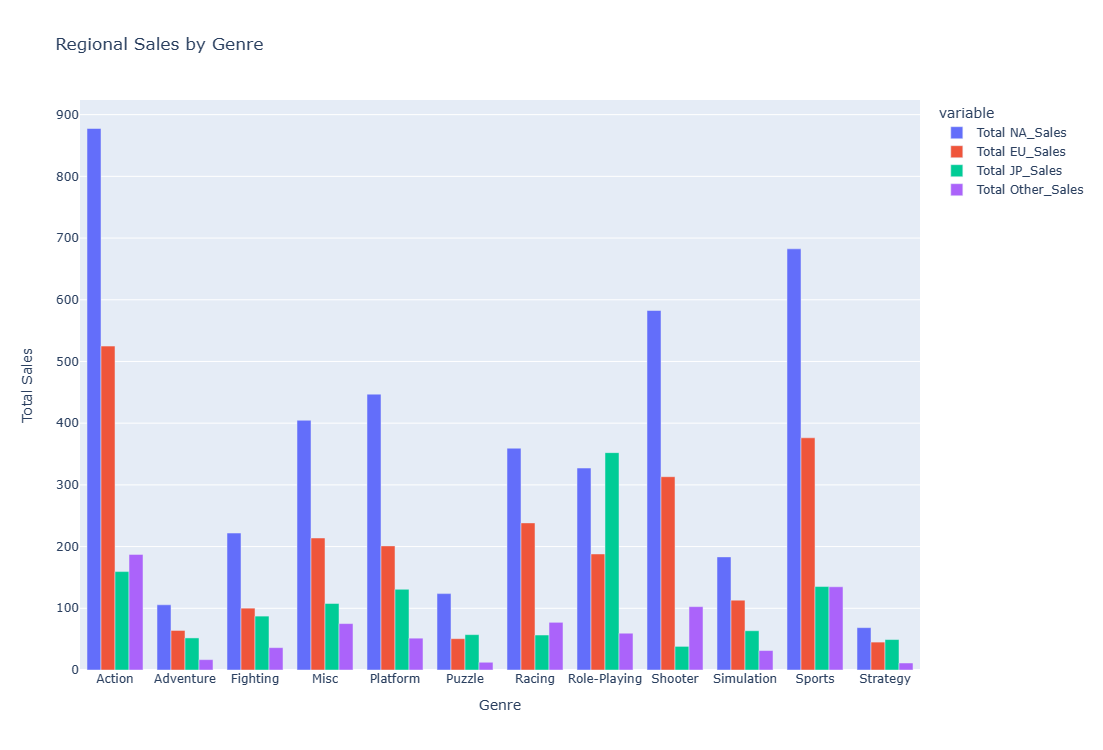

In [73]:
fig= px.bar(reg_genre_sales, 
            x= 'Genre', 
            y= ['Total NA_Sales', 'Total EU_Sales', 'Total JP_Sales', 'Total Other_Sales'], 
            title= 'Regional Sales by Genre', 
            labels= {'value': 'Total Sales'},
            barmode= 'group')

fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.write_image('regional_sales_by_genre.png')
fig.show()

#### Top Publishers by Game Released

In [74]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [75]:
df['Publisher'].nunique()

578

In [76]:
games_by_publisher= df.groupby('Publisher').size().reset_index(name= 'Total Games')
games_by_publisher.sort_values(by= 'Total Games', ascending= False, inplace= True, ignore_index= True)
top_ten_publisher= games_by_publisher.iloc[:10]
top_ten_publisher

Publisher  Total Games
0               Electronic Arts         1351
1                    Activision          975
2            Namco Bandai Games          932
3                       Ubisoft          921
4  Konami Digital Entertainment          832
5                           THQ          715
6                      Nintendo          703
7   Sony Computer Entertainment          683
8                          Sega          639
9          Take-Two Interactive          413

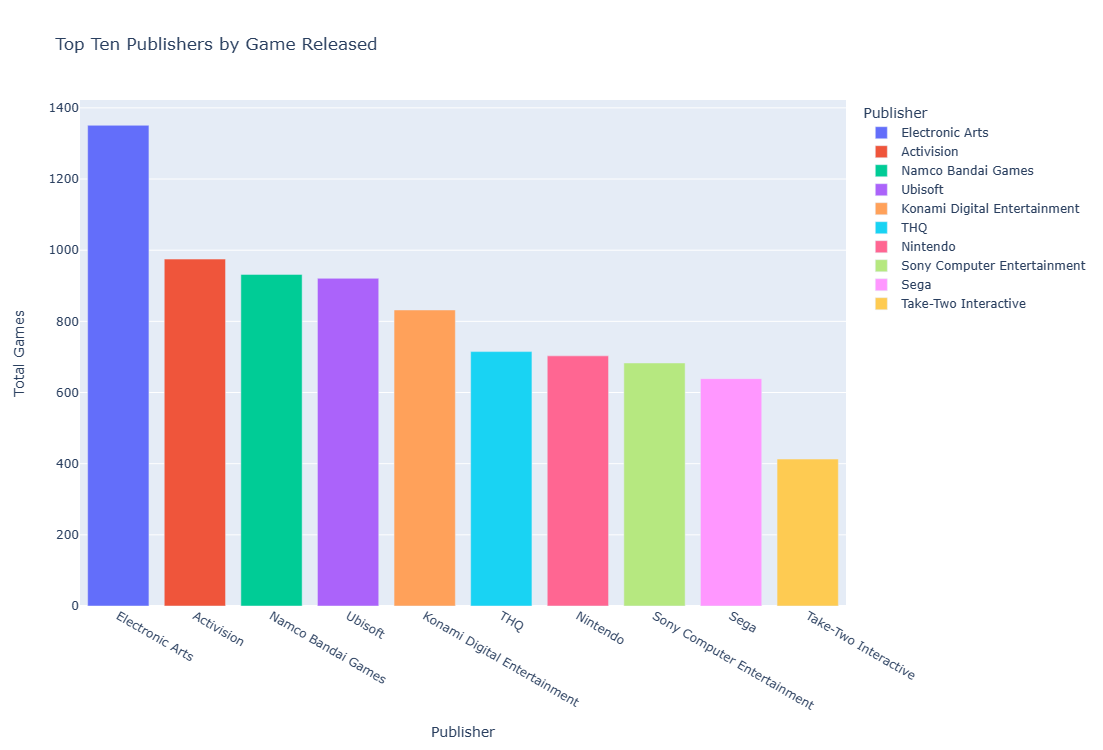

In [77]:
fig= px.bar(top_ten_publisher, 
            x= 'Publisher', 
            y= 'Total Games', 
            color= 'Publisher',
            title= 'Top Ten Publishers by Game Released', 
            labels= {'value': 'Total Sales'})

fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.write_image('top_ten_publishers_by_game_released.png')
fig.show()

In [78]:
bottom_ten_publisher= games_by_publisher.iloc[-10:].reset_index(drop= True)
bottom_ten_publisher

Publisher  Total Games
0                 Piacci            1
1                   Giga            1
2            Genterprise            1
3  General Entertainment            1
4               Gameloft            1
5              Playmates            1
6               Playmore            1
7                 Plenty            1
8            Pony Canyon            1
9           SCS Software            1

#### Top Ten Publishers by Global Sales

In [79]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [80]:
publisher_sales= df.groupby('Publisher')['Global_Sales'].sum().reset_index()

publisher_sales.sort_values(by= 'Global_Sales', ascending= False, inplace= True, ignore_index= True)
publisher_sales= publisher_sales.iloc[:10]
publisher_sales

Publisher  Global_Sales
0                      Nintendo       1786.56
1               Electronic Arts       1110.32
2                    Activision        727.46
3   Sony Computer Entertainment        607.50
4                       Ubisoft        474.72
5          Take-Two Interactive        399.54
6                           THQ        340.77
7  Konami Digital Entertainment        283.64
8                          Sega        272.99
9            Namco Bandai Games        254.09

In [81]:
publisher_values= publisher_sales['Global_Sales'].values

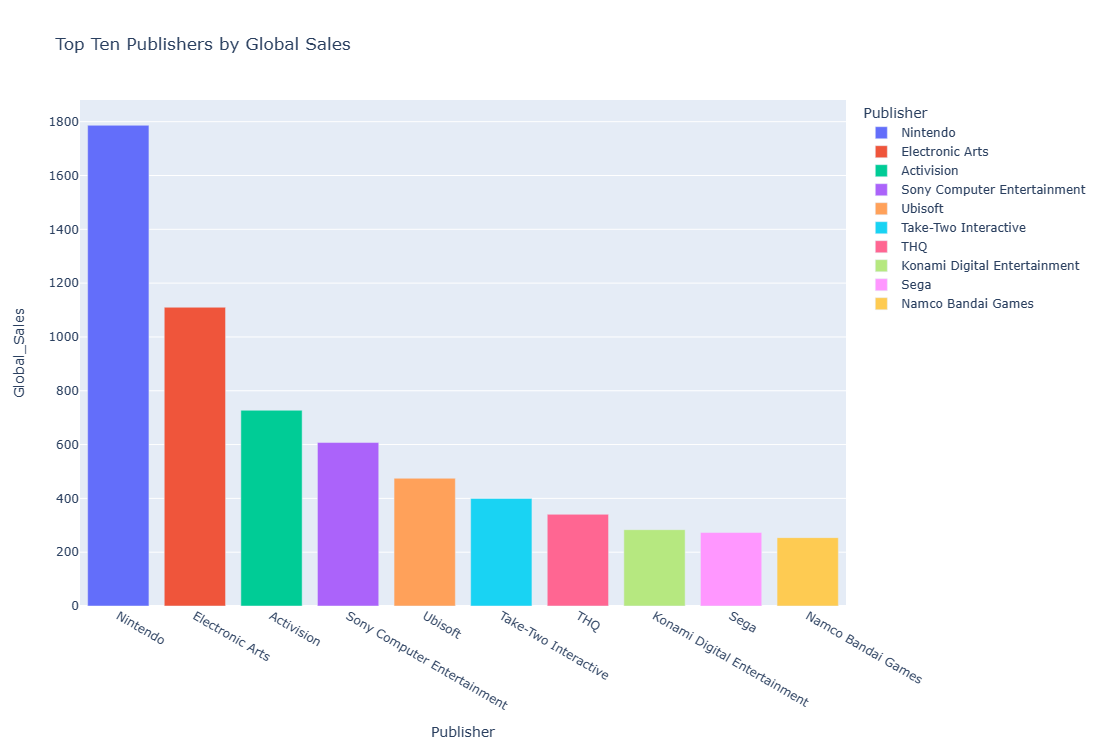

In [82]:
fig= px.bar(publisher_sales, 
            x= 'Publisher', 
            y= 'Global_Sales', 
            color= 'Publisher',
            title= 'Top Ten Publishers by Global Sales', 
            labels= {'value': 'Total Sales'})


fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.show()

#### Top Publisher Yearly by Game Produced 

In [83]:
publisher_by_year= df.groupby(['Year', 'Publisher']).size().reset_index(name= 'Total Games')
publisher_by_year.head()

Year                     Publisher  Total Games
0  1980                    Activision            5
1  1980                         Atari            4
2  1981  20th Century Fox Video Games            3
3  1981                    Activision            6
4  1981                         Atari           11

In [84]:
top_publisher_by_year_id= publisher_by_year.groupby('Year')['Total Games'].transform('max') == publisher_by_year['Total Games']
top_publisher_by_year= publisher_by_year[top_publisher_by_year_id].reset_index(drop= True)
top_publisher_by_year.drop_duplicates(subset= ['Year', 'Total Games'], keep= 'last', inplace= True, ignore_index= True)
top_publisher_by_year

Year                     Publisher  Total Games
0   1980                    Activision            5
1   1981                         Atari           11
2   1982                         Atari           14
3   1983                      Nintendo            6
4   1984                      Nintendo            9
5   1985                      Nintendo            7
6   1986                      Nintendo            6
7   1987                      Nintendo            4
8   1988                      Nintendo            6
9   1989                      Nintendo            9
10  1990                      Nintendo            7
11  1991                      Nintendo           13
12  1992                      Nintendo           10
13  1993                      Nintendo            9
14  1994                          Sega           26
15  1995   Sony Computer Entertainment           31
16  1996   Sony Computer Entertainment           28
17  1997   Sony Computer Entertainment           34
18  1998   Sony Computer Entertainment           30
19  1999  Konami Digital Entertainment           32
20  2000   Sony Computer Entertainment           32
21  2001               Electronic Arts           43
22  2002               Electronic Arts           88
23  2003               Electronic Arts           85
24  2004               Electronic Arts           86
25  2005               Electronic Arts          117
26  2006               Electronic Arts          114
27  2007               Electronic Arts          107
28  2008               Electronic Arts          120
29  2009                    Activision          121
30  2010                    Activision           89
31  2011                       Ubisoft           87
32  2012            Namco Bandai Games           85
33  2013            Namco Bandai Games           63
34  2014            Namco Bandai Games           69
35  2015            Namco Bandai Games           68
36  2016            Namco Bandai Games           40
37  2017                          Sega            2
38  2020                       Ubisoft            1

In [85]:
publisher_values= top_publisher_by_year['Publisher'].values
publisher_values

array(['Activision', 'Atari', 'Atari', 'Nintendo', 'Nintendo', 'Nintendo',
       'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
       'Nintendo', 'Nintendo', 'Nintendo', 'Sega',
       'Sony Computer Entertainment', 'Sony Computer Entertainment',
       'Sony Computer Entertainment', 'Sony Computer Entertainment',
       'Konami Digital Entertainment', 'Sony Computer Entertainment',
       'Electronic Arts', 'Electronic Arts', 'Electronic Arts',
       'Electronic Arts', 'Electronic Arts', 'Electronic Arts',
       'Electronic Arts', 'Electronic Arts', 'Activision', 'Activision',
       'Ubisoft', 'Namco Bandai Games', 'Namco Bandai Games',
       'Namco Bandai Games', 'Namco Bandai Games', 'Namco Bandai Games',
       'Sega', 'Ubisoft'], dtype=object)

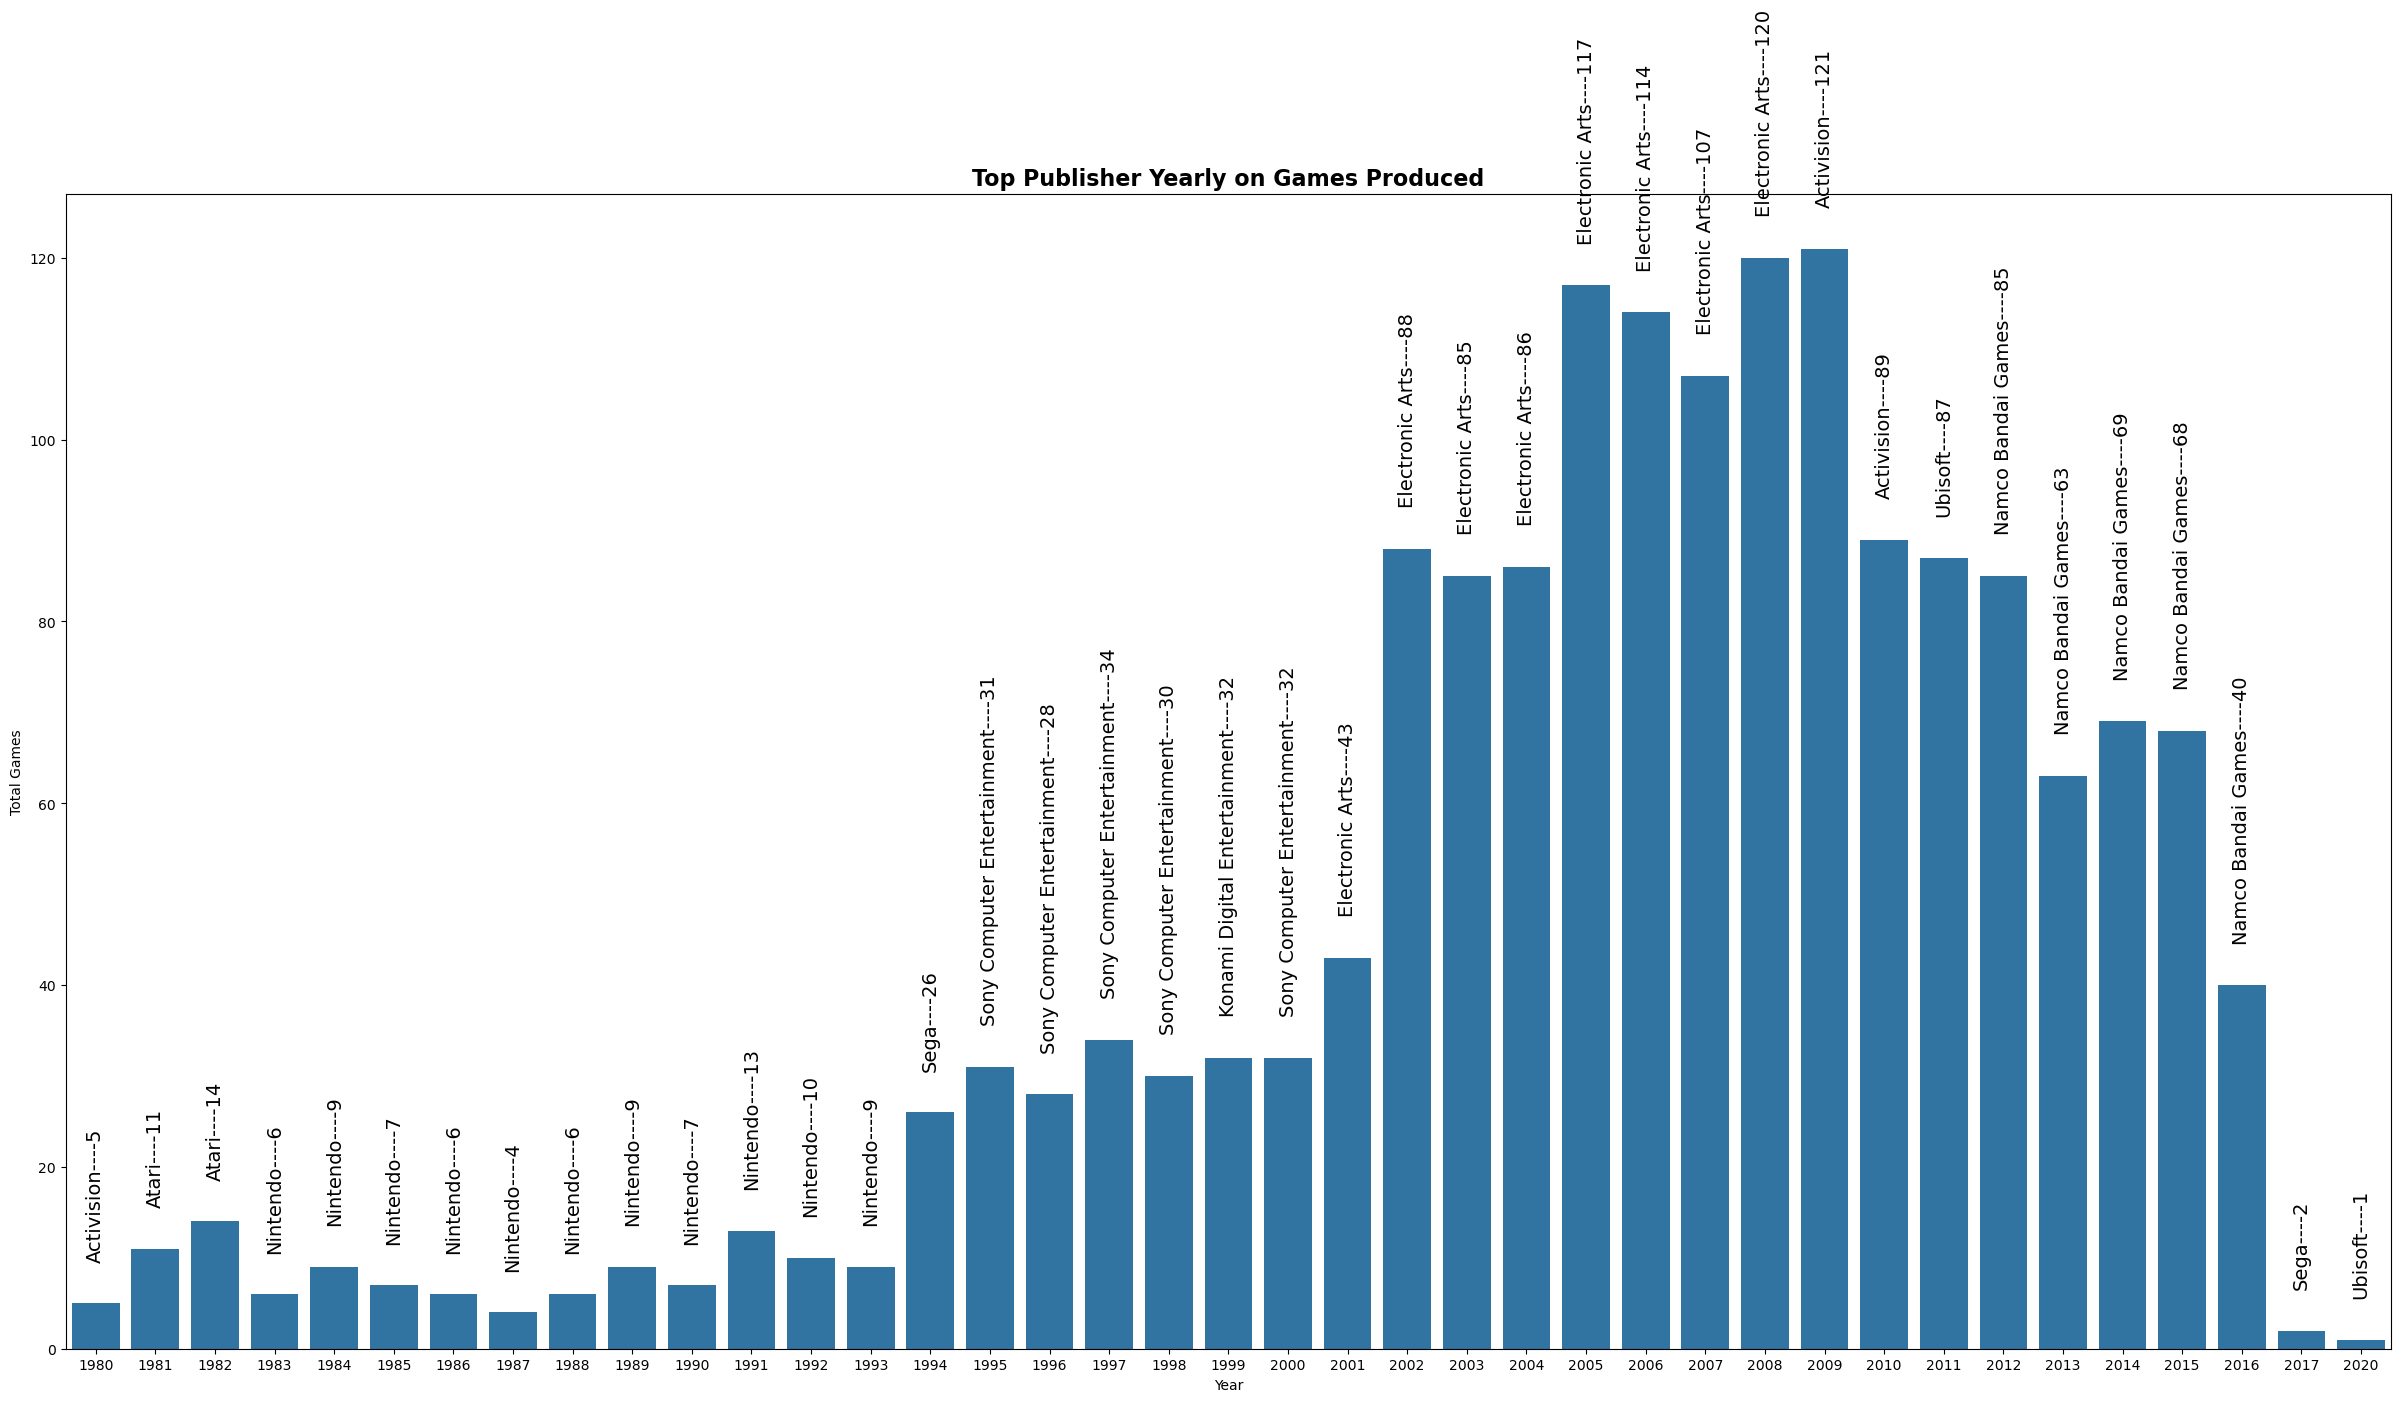

In [86]:
plt.figure(figsize= (30,15))
g= sns.barplot(data= top_publisher_by_year, x= 'Year', y= 'Total Games')
plt.title('Top Publisher Yearly on Games Produced', fontsize= 16, weight= 'bold')

index= 0
for value in top_publisher_by_year['Total Games'].values:
    g.text(index, value + 5, str(publisher_values[index] + '----' + str(value)), color= '#000', size= 14, rotation= 90, ha= 'center')
    index += 1

plt.savefig('top_publisher_yearly_by_games_produced.png')

#### Regional Sales Distribution 

In [87]:
df.head(2)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0   1.0         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1   2.0  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [88]:
regional_sales= df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
regional_sales.rename(columns= {'index': 'Region', 0: 'Total Sales'}, inplace= True)
regional_sales

Region  Total Sales
0     NA_Sales      4384.41
1     EU_Sales      2429.45
2     JP_Sales      1290.09
3  Other_Sales       797.08

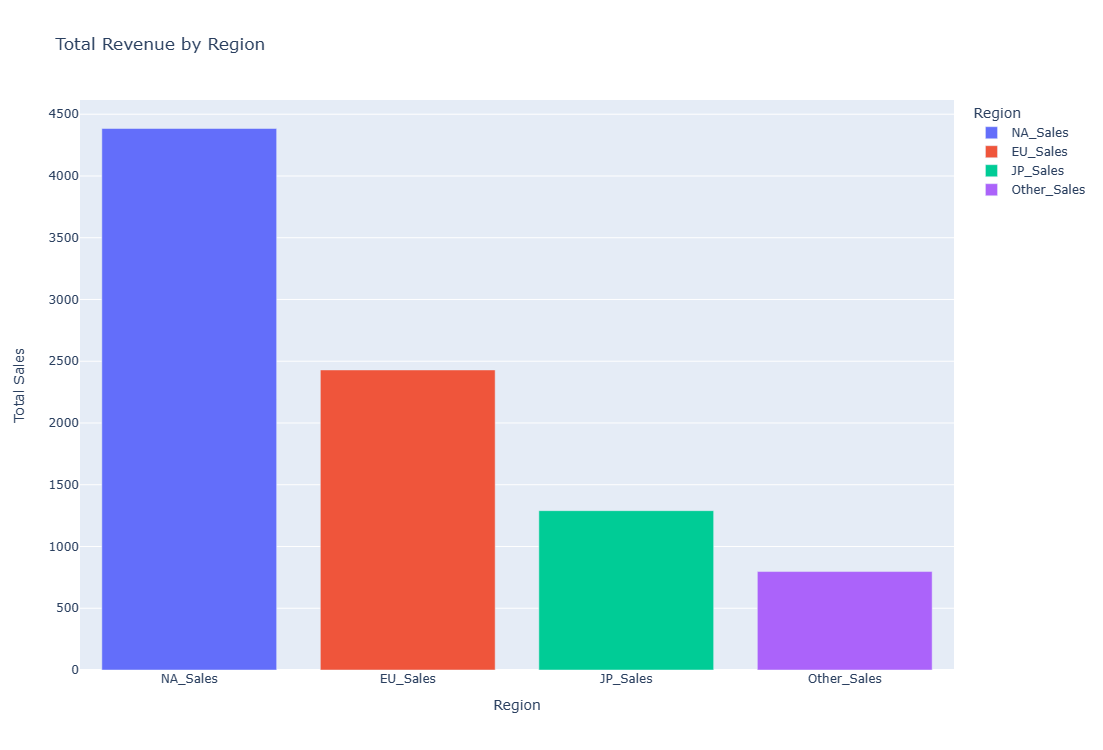

In [89]:
fig= px.bar(regional_sales, 
            x= 'Region', 
            y= 'Total Sales', 
            color= 'Region',
            title= 'Total Revenue by Region', 
            labels= {'value': 'Total Sales'})


fig.update_layout(
    width= 1100, 
    height= 750, 
    bargap= 0.2)
fig.show()

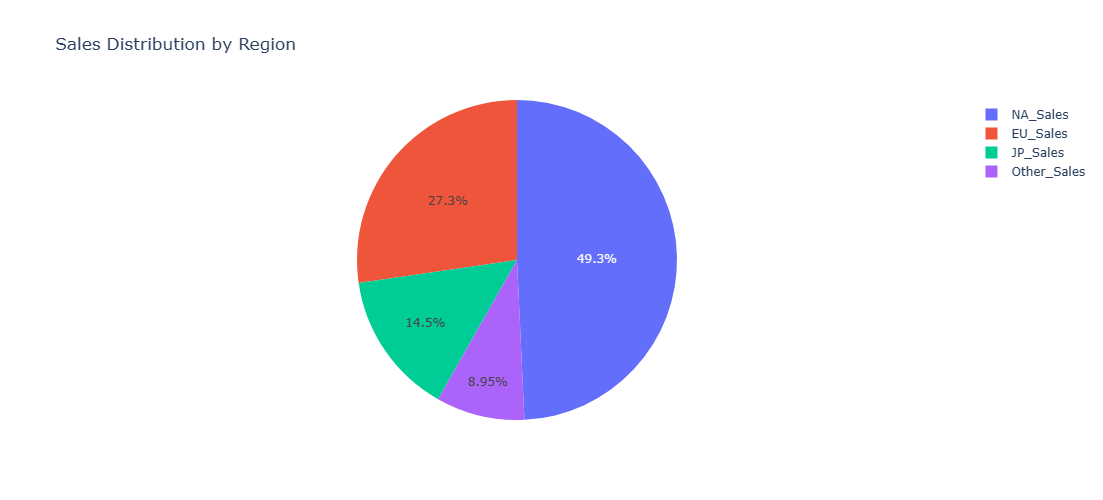

In [90]:
fig= px.pie(regional_sales, 
            values= 'Total Sales', 
            names= 'Region', 
            title= 'Sales Distribution by Region')
fig.update_layout(
    width= 800,
    height= 500
)
fig.write_image('regional_sales_dist.png')
fig.show()

#### Top Ten Publishers Distribution by Games

In [91]:
top_ten_publisher

Publisher  Total Games
0               Electronic Arts         1351
1                    Activision          975
2            Namco Bandai Games          932
3                       Ubisoft          921
4  Konami Digital Entertainment          832
5                           THQ          715
6                      Nintendo          703
7   Sony Computer Entertainment          683
8                          Sega          639
9          Take-Two Interactive          413

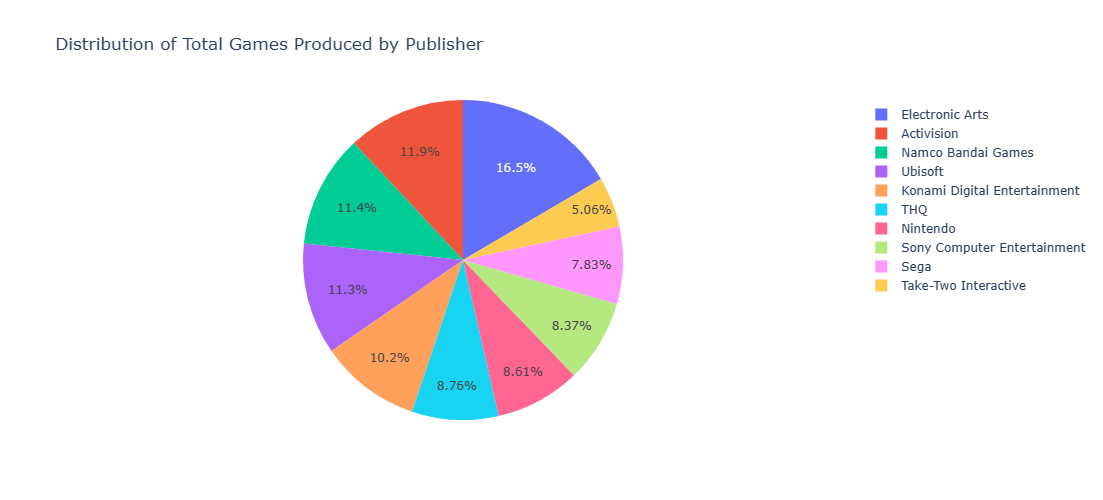

In [92]:
fig= px.pie(top_ten_publisher, 
            values= 'Total Games', 
            names= 'Publisher', 
            title= 'Distribution of Total Games Produced by Publisher')
fig.update_layout(
    width= 800,
    height= 500
)
fig.show()